## Import

In [113]:
from statistics import LinearRegression

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.dates as mdates
import numpy as np


df = pd.read_csv('covid_combined_data.csv')
df['date'] = pd.to_datetime(df['date'])
df['Q'] = df['date'].dt.to_period('Q').astype(str)
countries_df = pd.read_csv('countries_combined_data.csv')

## Część 1

Wyznacz średnią kroczącą i odchylenie standardowe kroczące (np. 7-dniowe), aby zobaczyć, jak te zjawiska zmieniają się w czasie. Obliczenia wykonaj dla:


1.1. liczby nowych zachorowań,



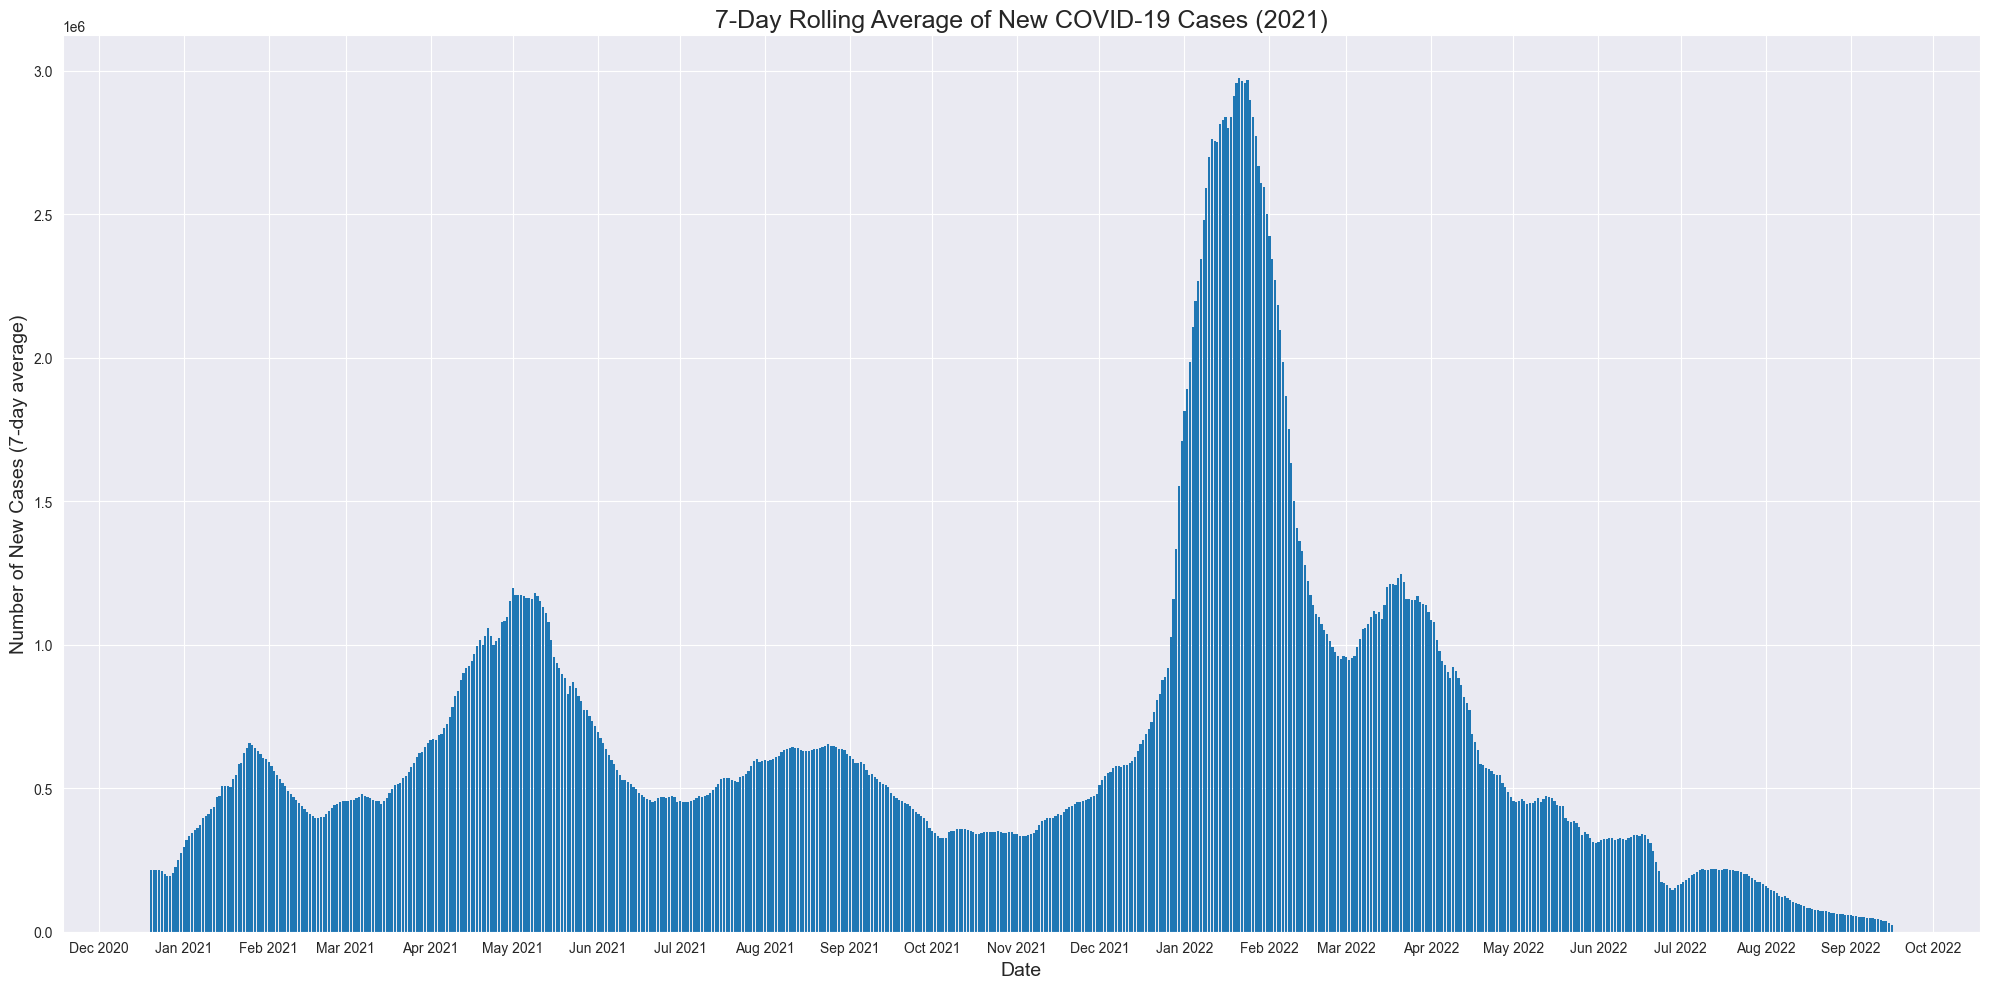

In [114]:
df_daily = df[df['subregion1_name_x'].isna()]
df_daily = df.set_index('date').resample('D').sum()
df_daily['rolling_mean'] = df_daily['new_confirmed'].rolling(window=7).mean()
df_daily = df_daily.reset_index()  # Reset index to make 'date' a column again
df_daily['Q'] = df_daily['date'].dt.to_period('Q').astype(str)

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean'], edgecolor='none')  # Remove black outline

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Cases (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Cases (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  # 'Jan 2025', 'Feb 2025', etc.
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))  # Show every month
plt.tight_layout()
plt.show()

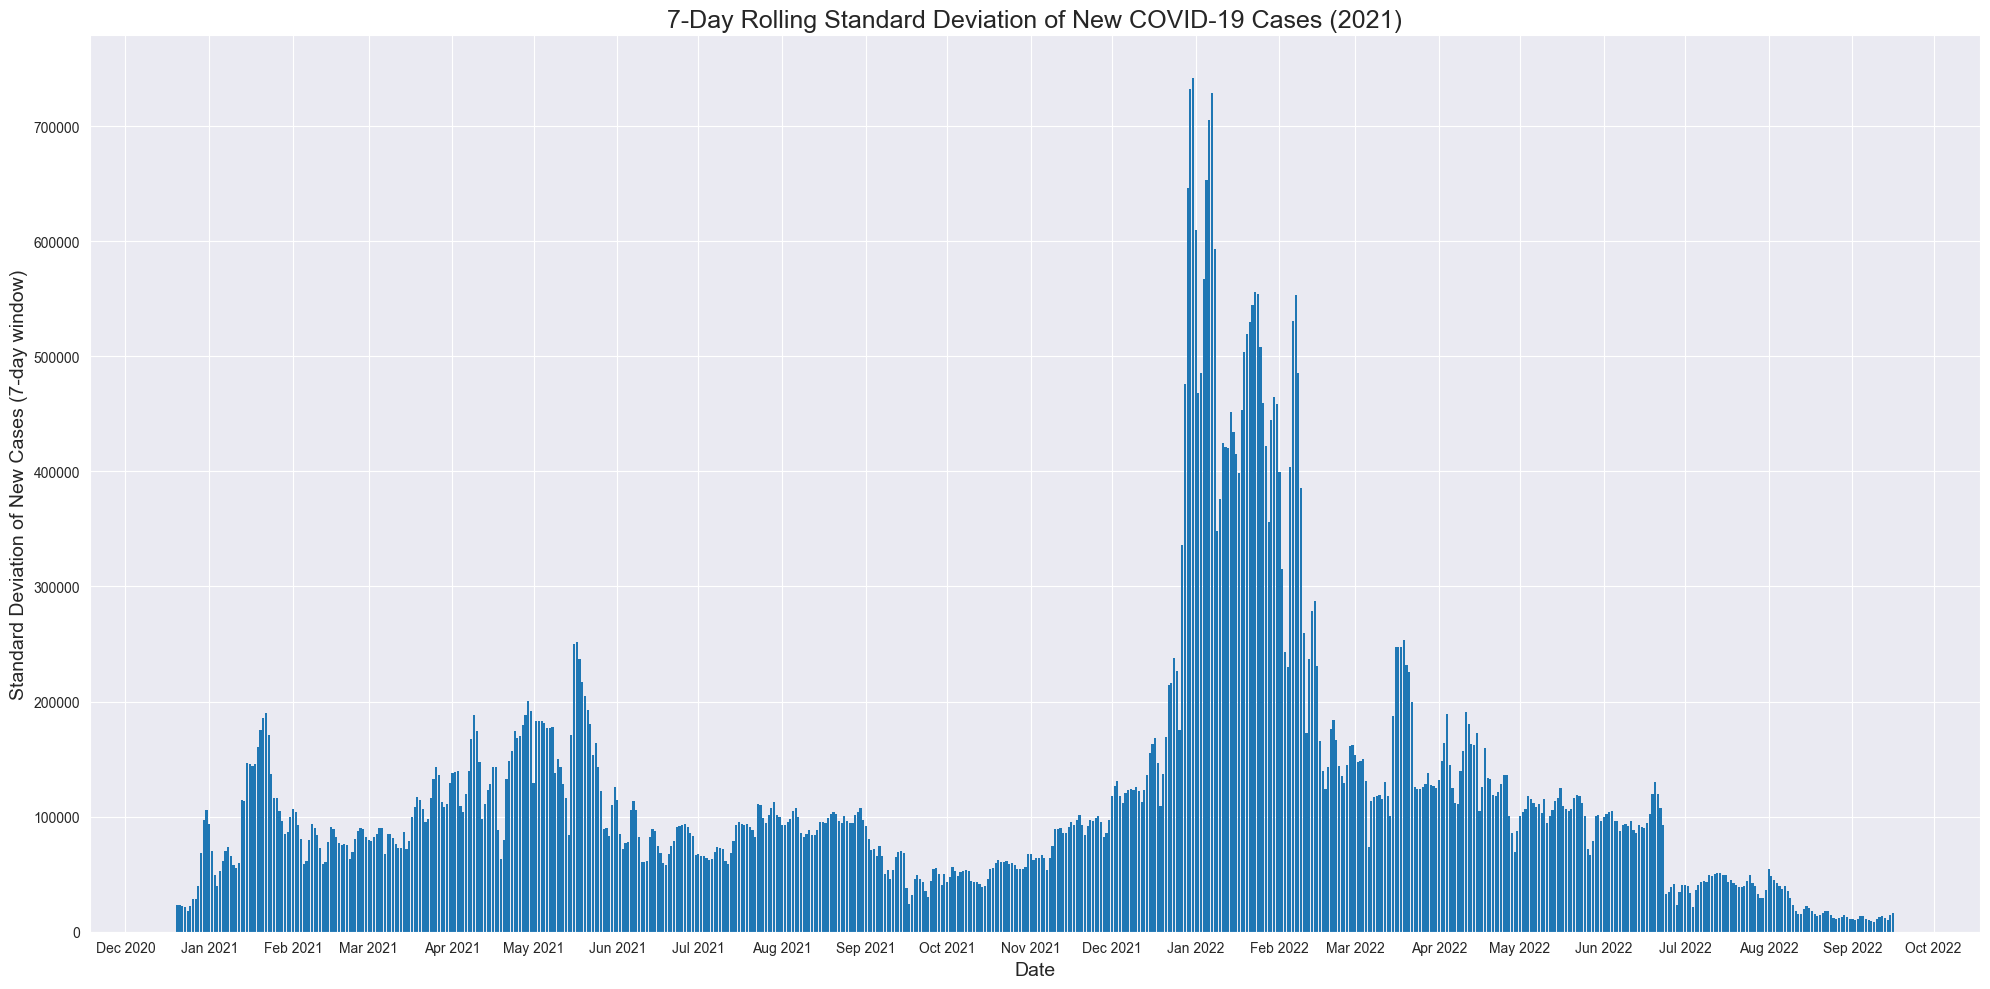

In [115]:
# Calculate 7-day rolling standard deviation for new confirmed cases
df_daily['rolling_std'] = df_daily['new_confirmed'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Cases (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Cases (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.2. liczby nowych śmierci,



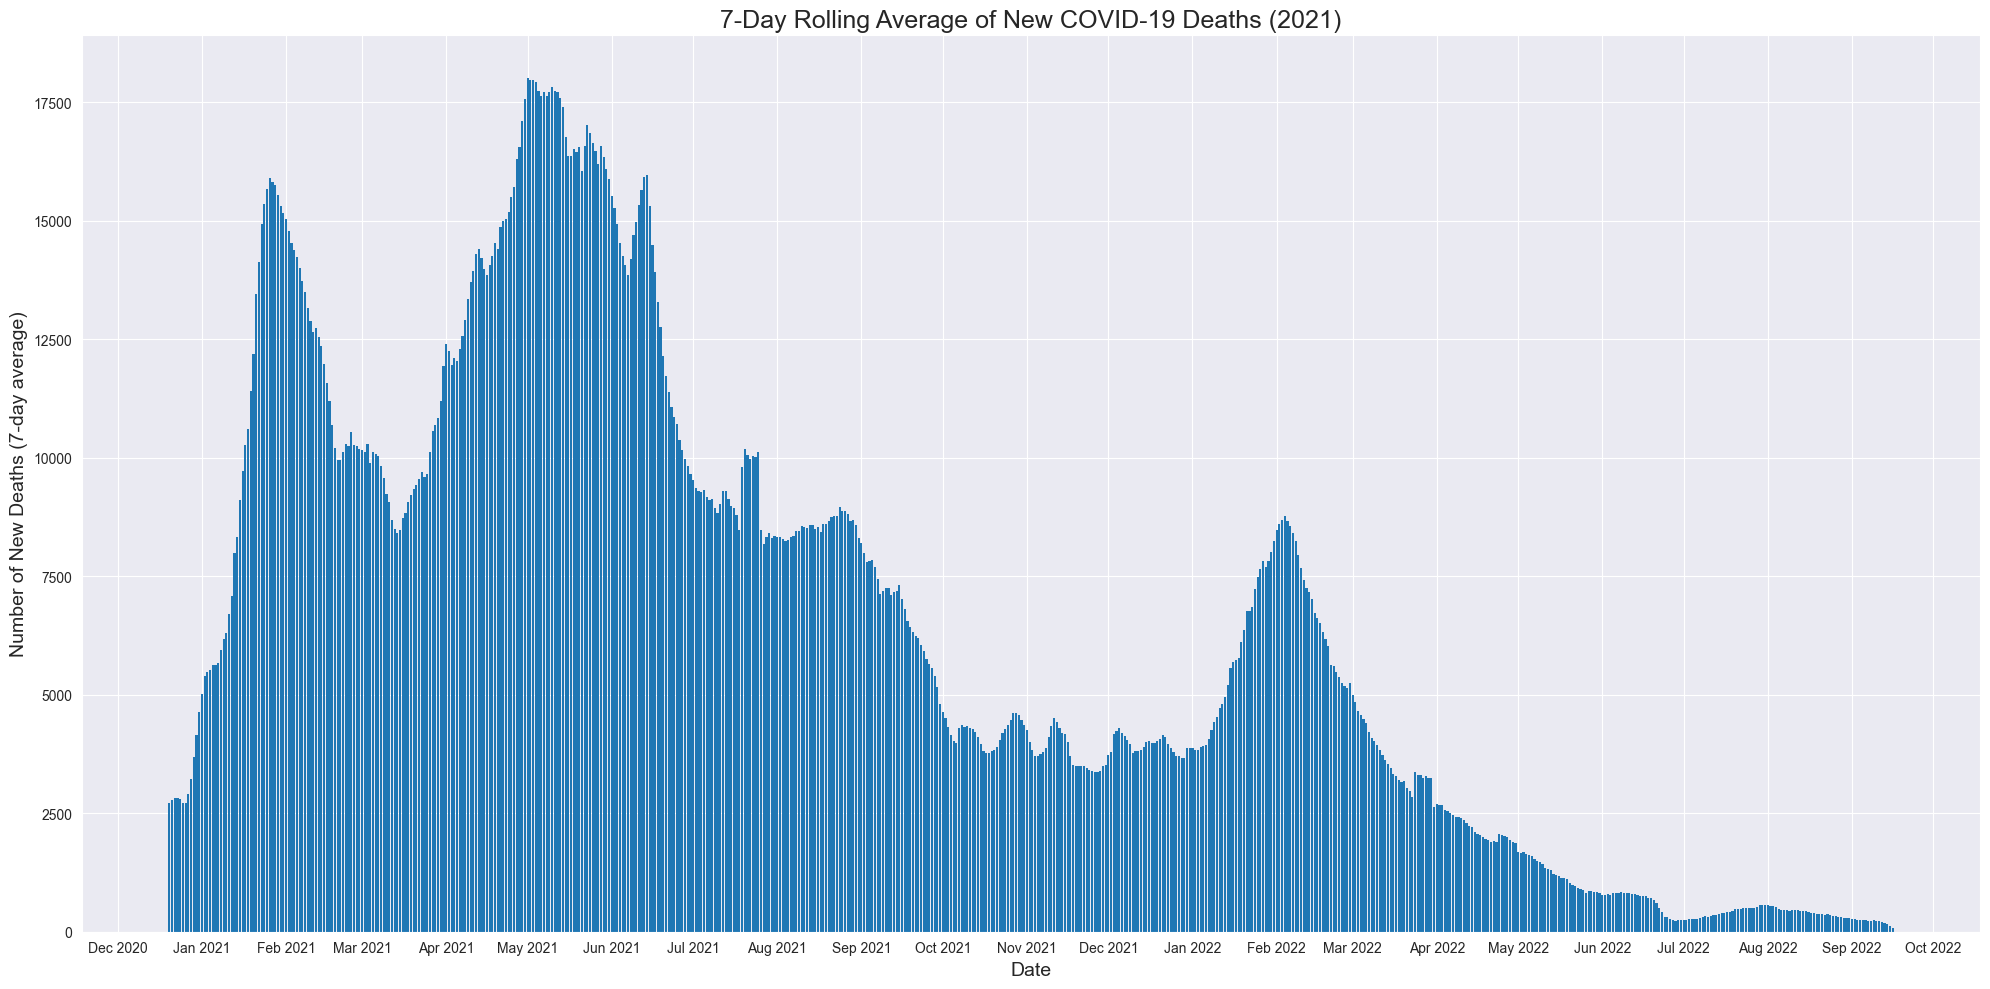

In [116]:
# Calculate 7-day rolling mean for new deaths
df_daily['rolling_mean_deaths'] = df_daily['new_deceased'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_deaths'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Deaths (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Deaths (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

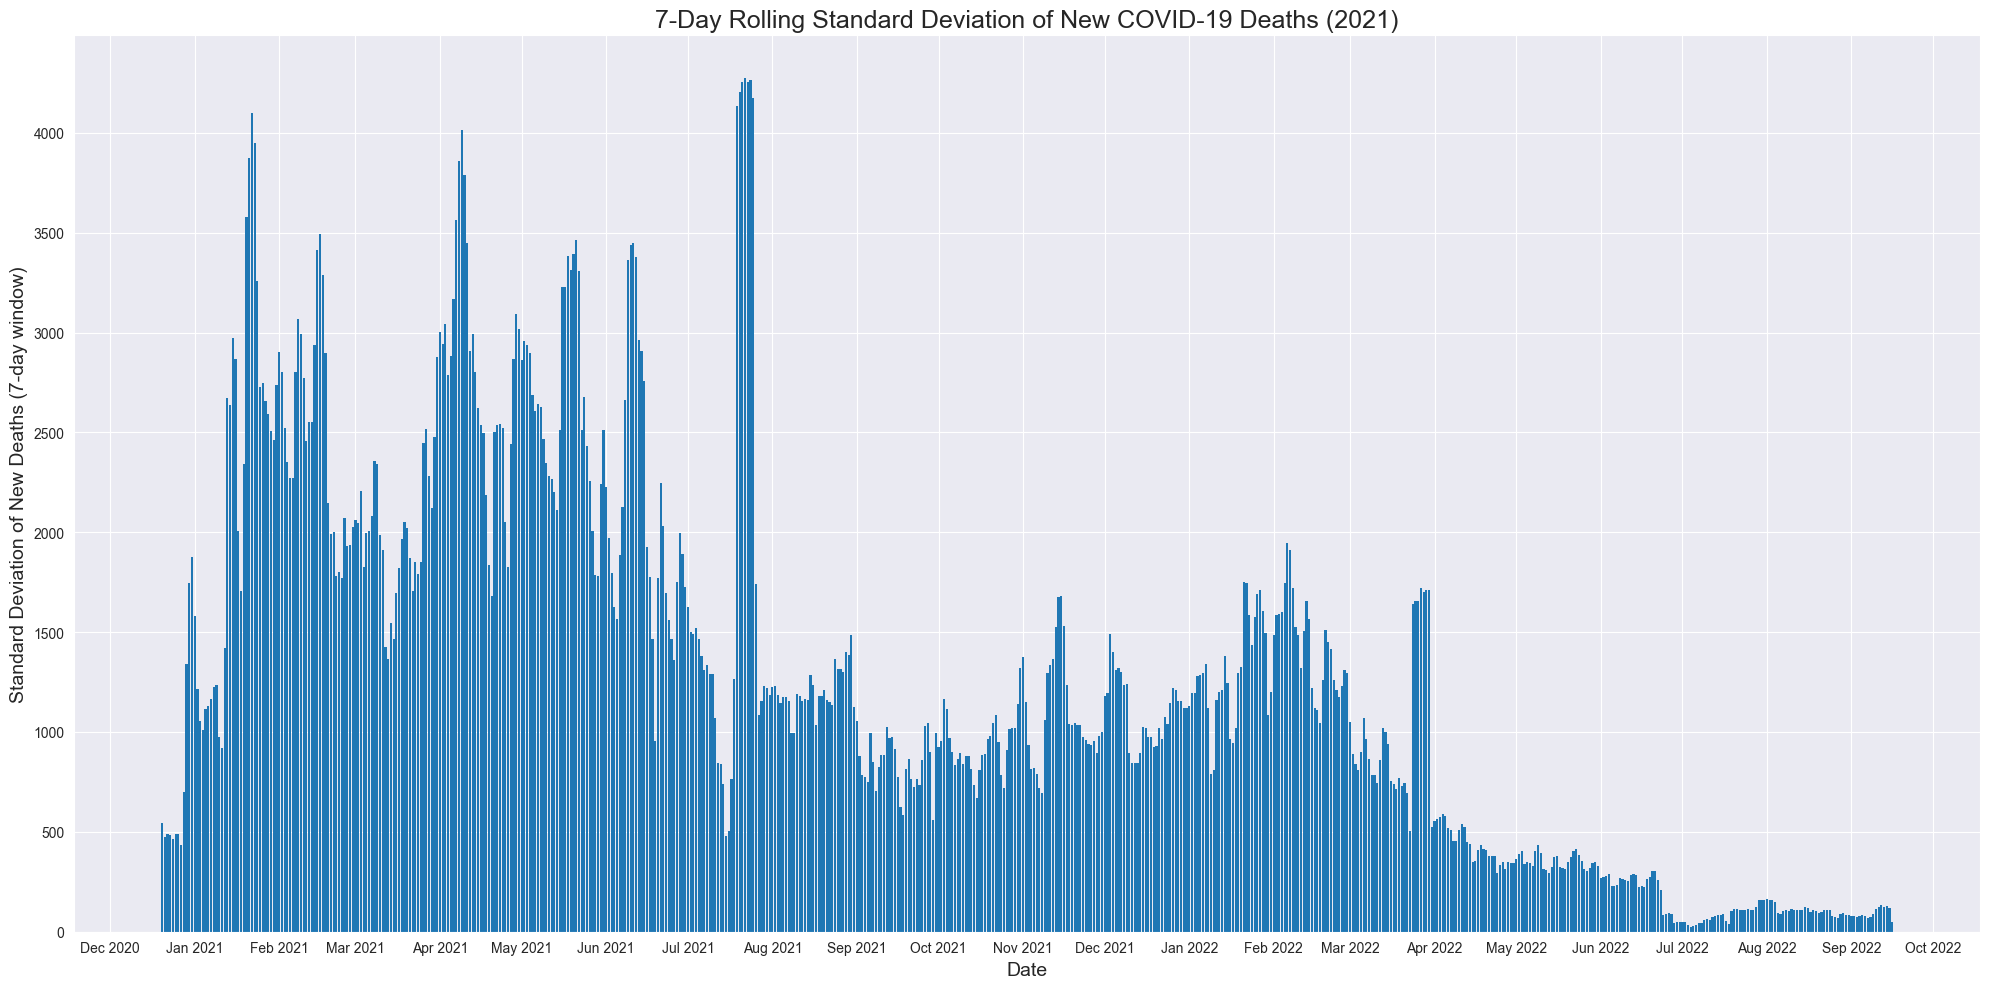

In [117]:
# Calculate 7-day rolling standard deviation for new deaths
df_daily['rolling_std_deaths'] = df_daily['new_deceased'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_deaths'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Deaths (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Deaths (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.3. liczby nowych szczepień,



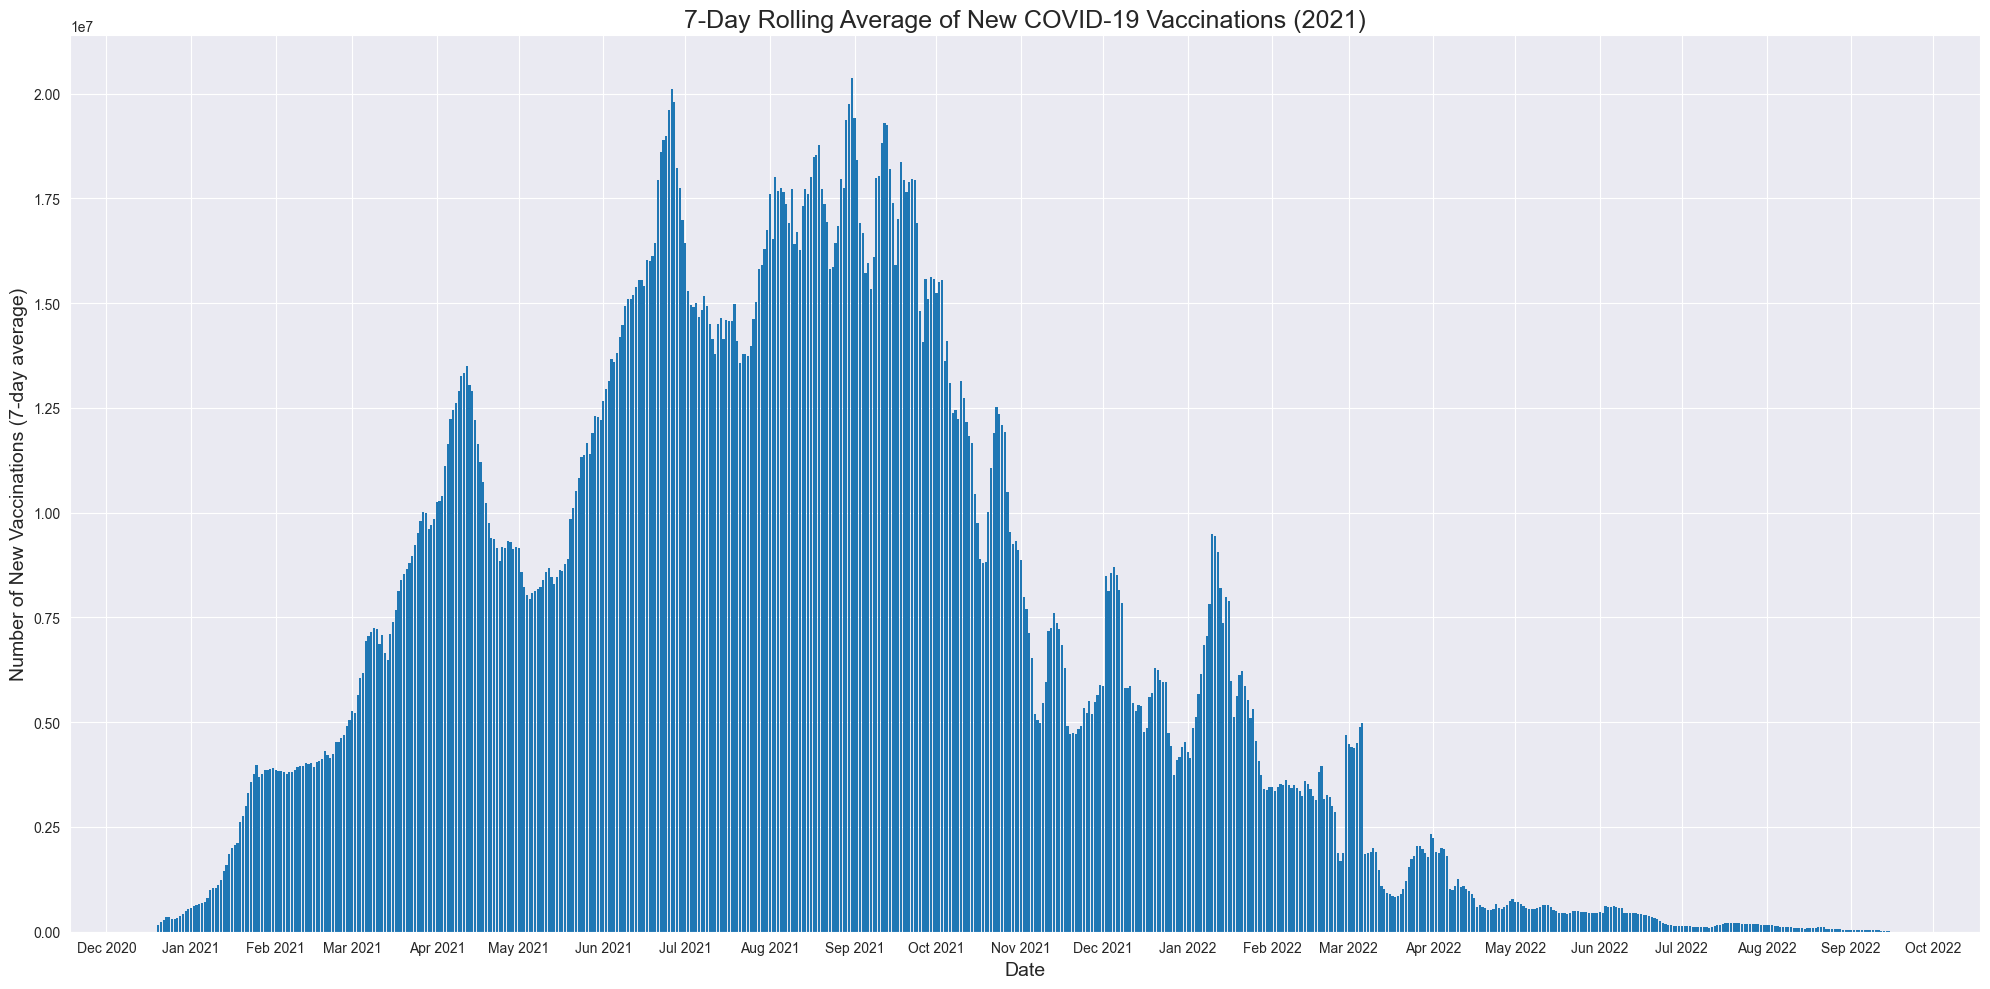

In [118]:
# Calculate 7-day rolling mean for new vaccinations
df_daily['rolling_mean_vaccinations'] = df_daily['new_persons_vaccinated'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_vaccinations'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New COVID-19 Vaccinations (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccinations (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

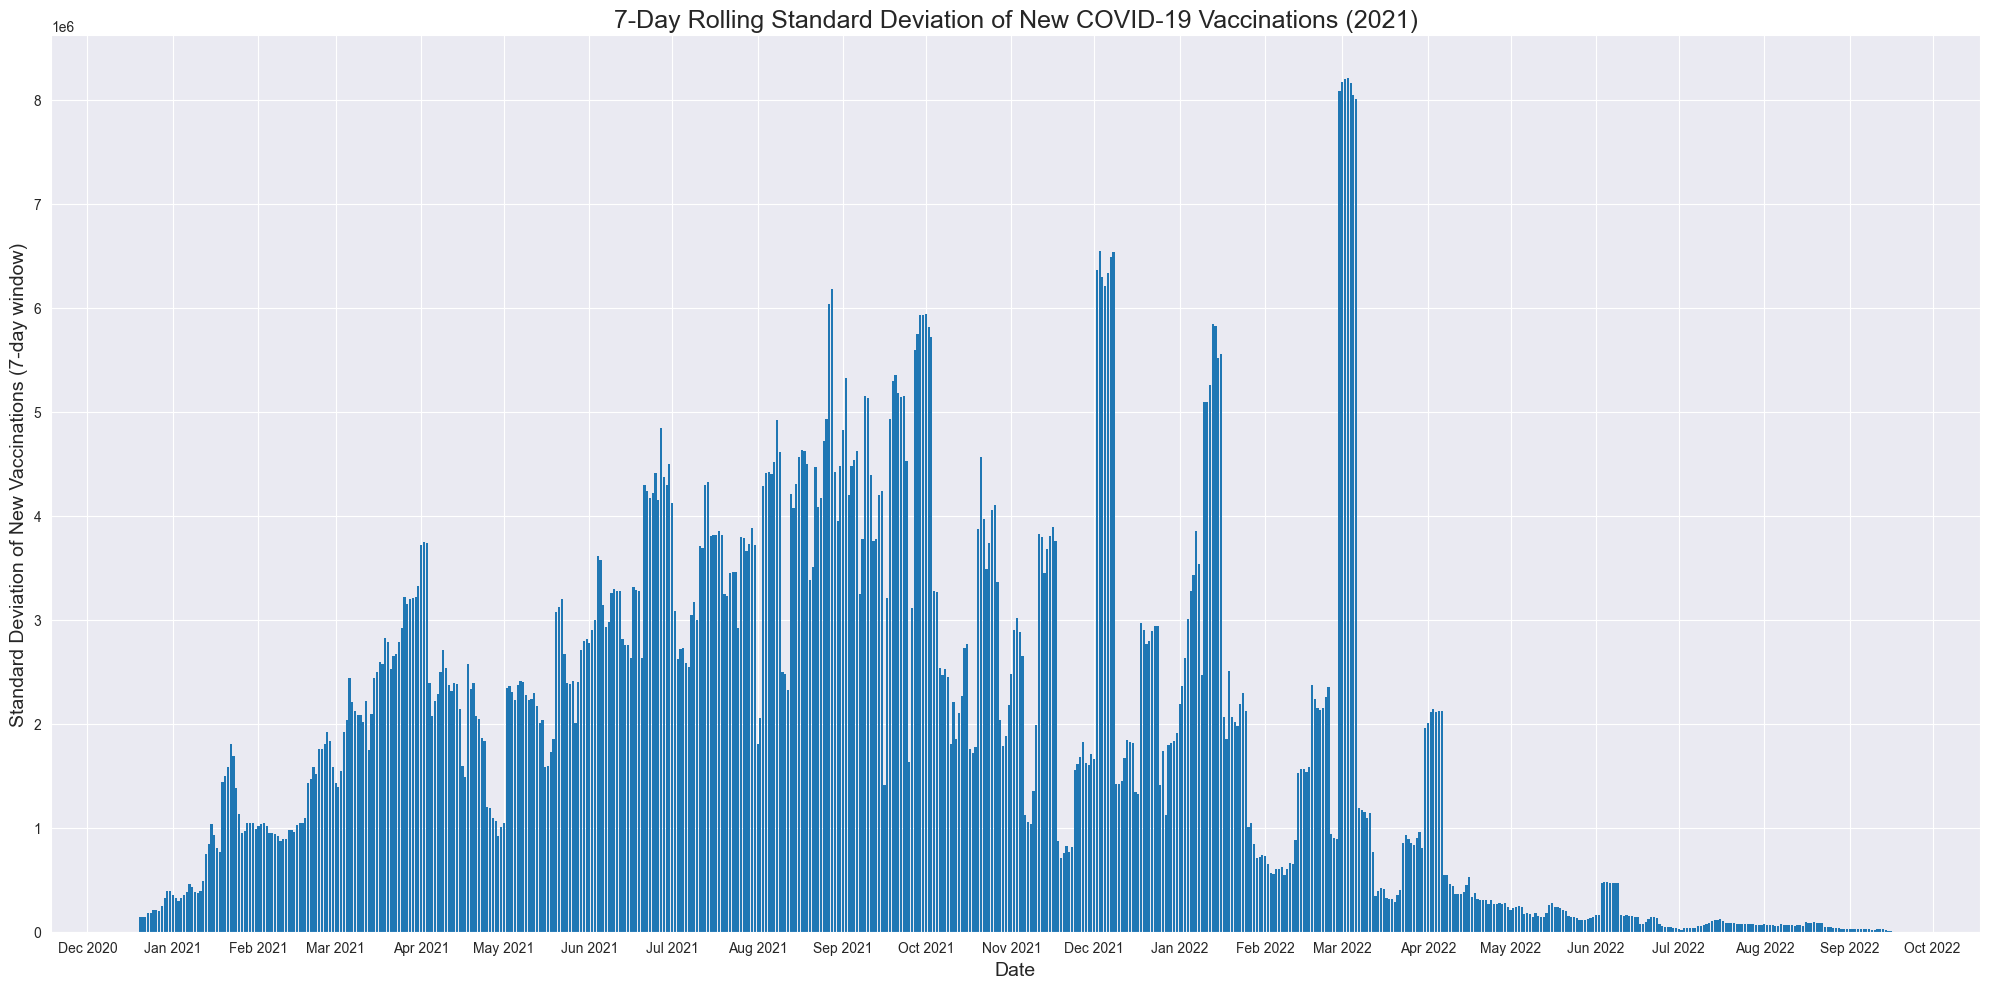

In [119]:
# Calculate 7-day rolling standard deviation for new vaccinations
df_daily['rolling_std_vaccinations'] = df_daily['new_persons_vaccinated'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_vaccinations'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New COVID-19 Vaccinations (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Vaccinations (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.4.1 liczba osób w pełni zaszczepionych



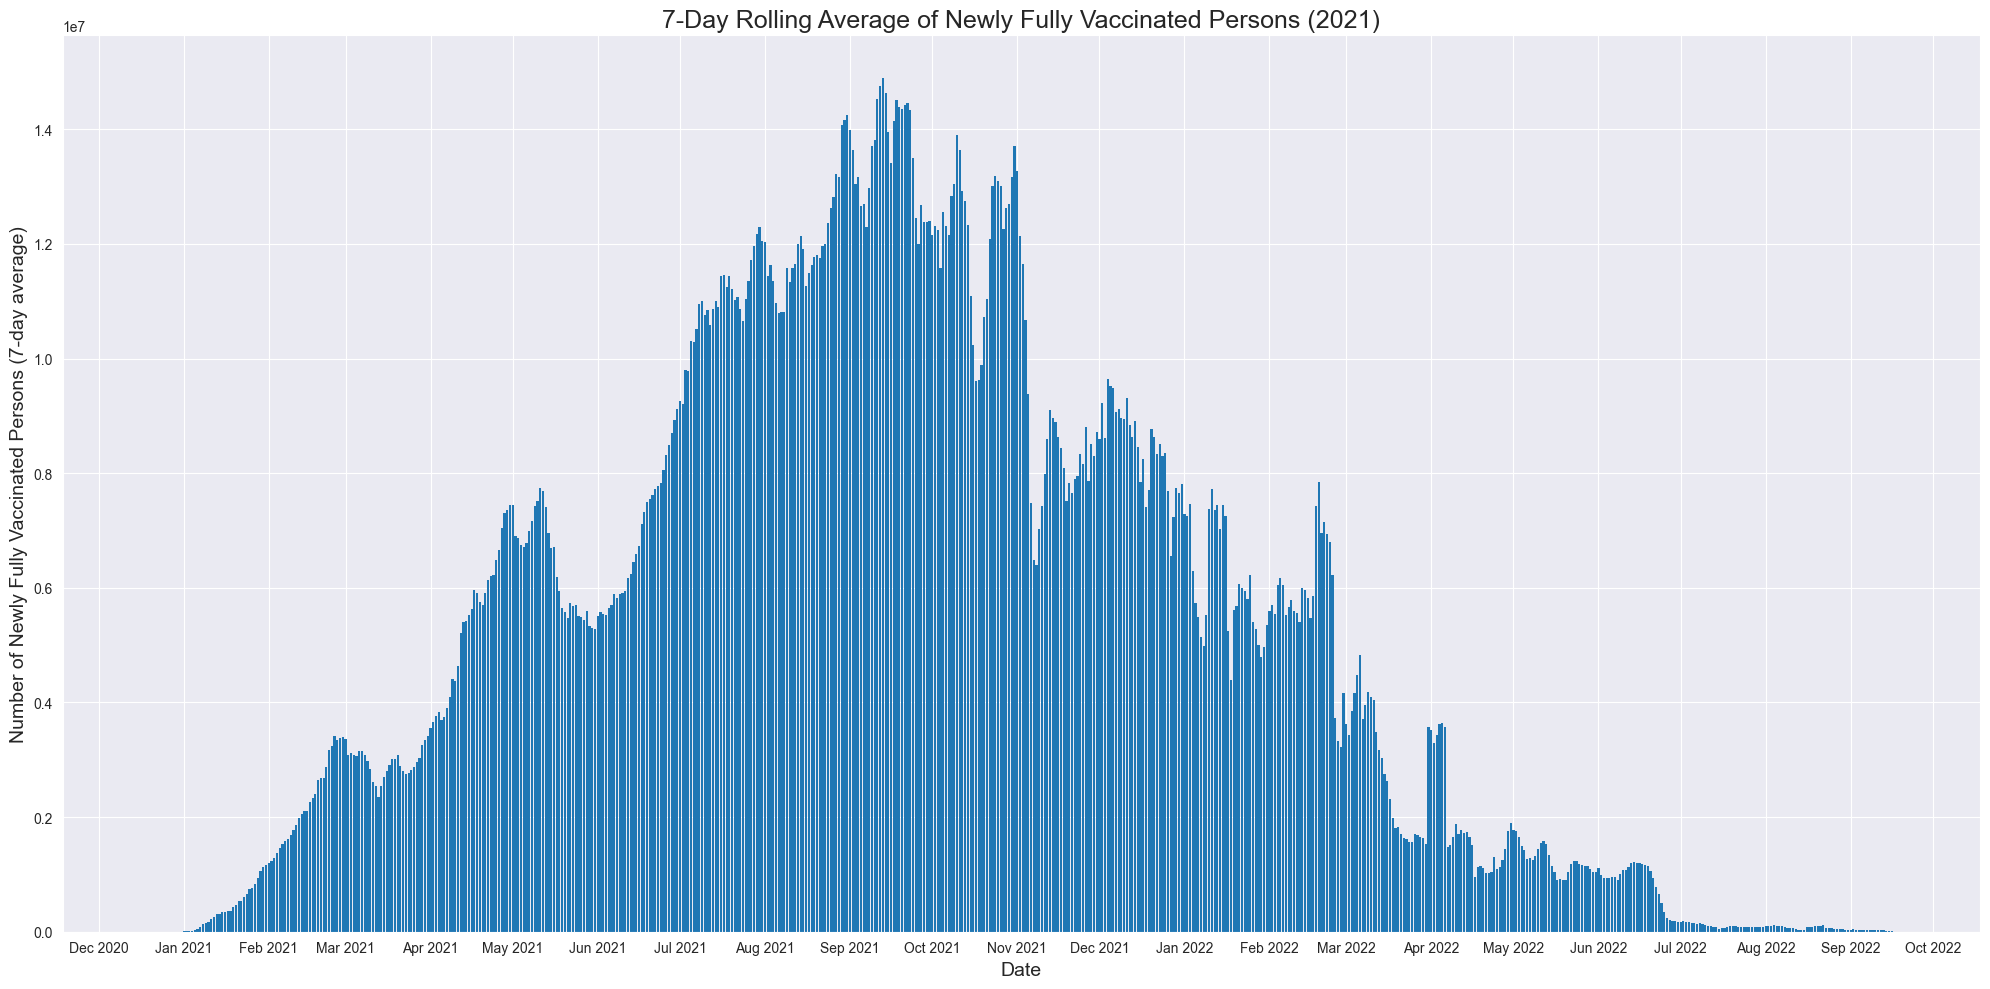

In [120]:
# Calculate 7-day rolling mean for fully vaccinated persons
df_daily['rolling_mean_fully_vaccinated'] = df_daily['new_persons_fully_vaccinated'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_fully_vaccinated'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of Newly Fully Vaccinated Persons (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Newly Fully Vaccinated Persons (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

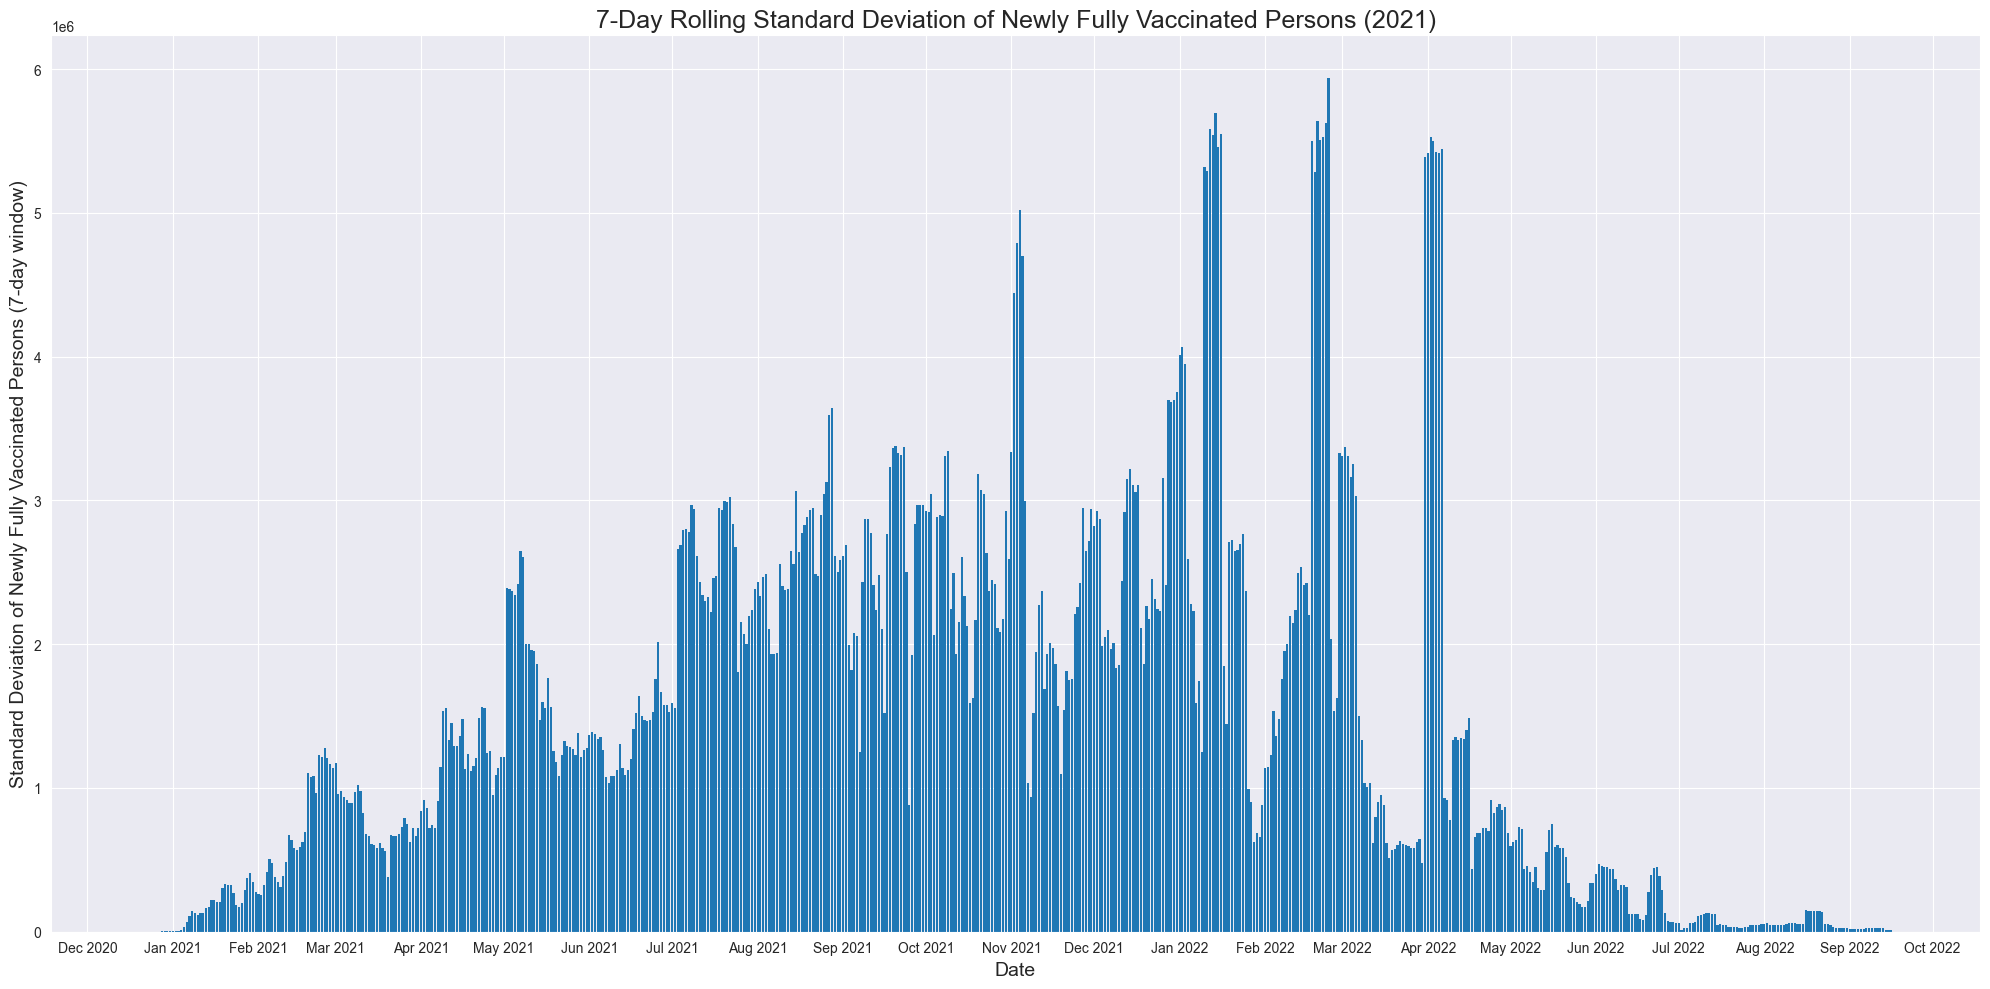

In [121]:
# Calculate 7-day rolling standard deviation for fully vaccinated persons
df_daily['rolling_std_fully_vaccinated'] = df_daily['new_persons_fully_vaccinated'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_fully_vaccinated'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of Newly Fully Vaccinated Persons (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of Newly Fully Vaccinated Persons (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

1.4.2 liczba zaaplikowanych szczepionek



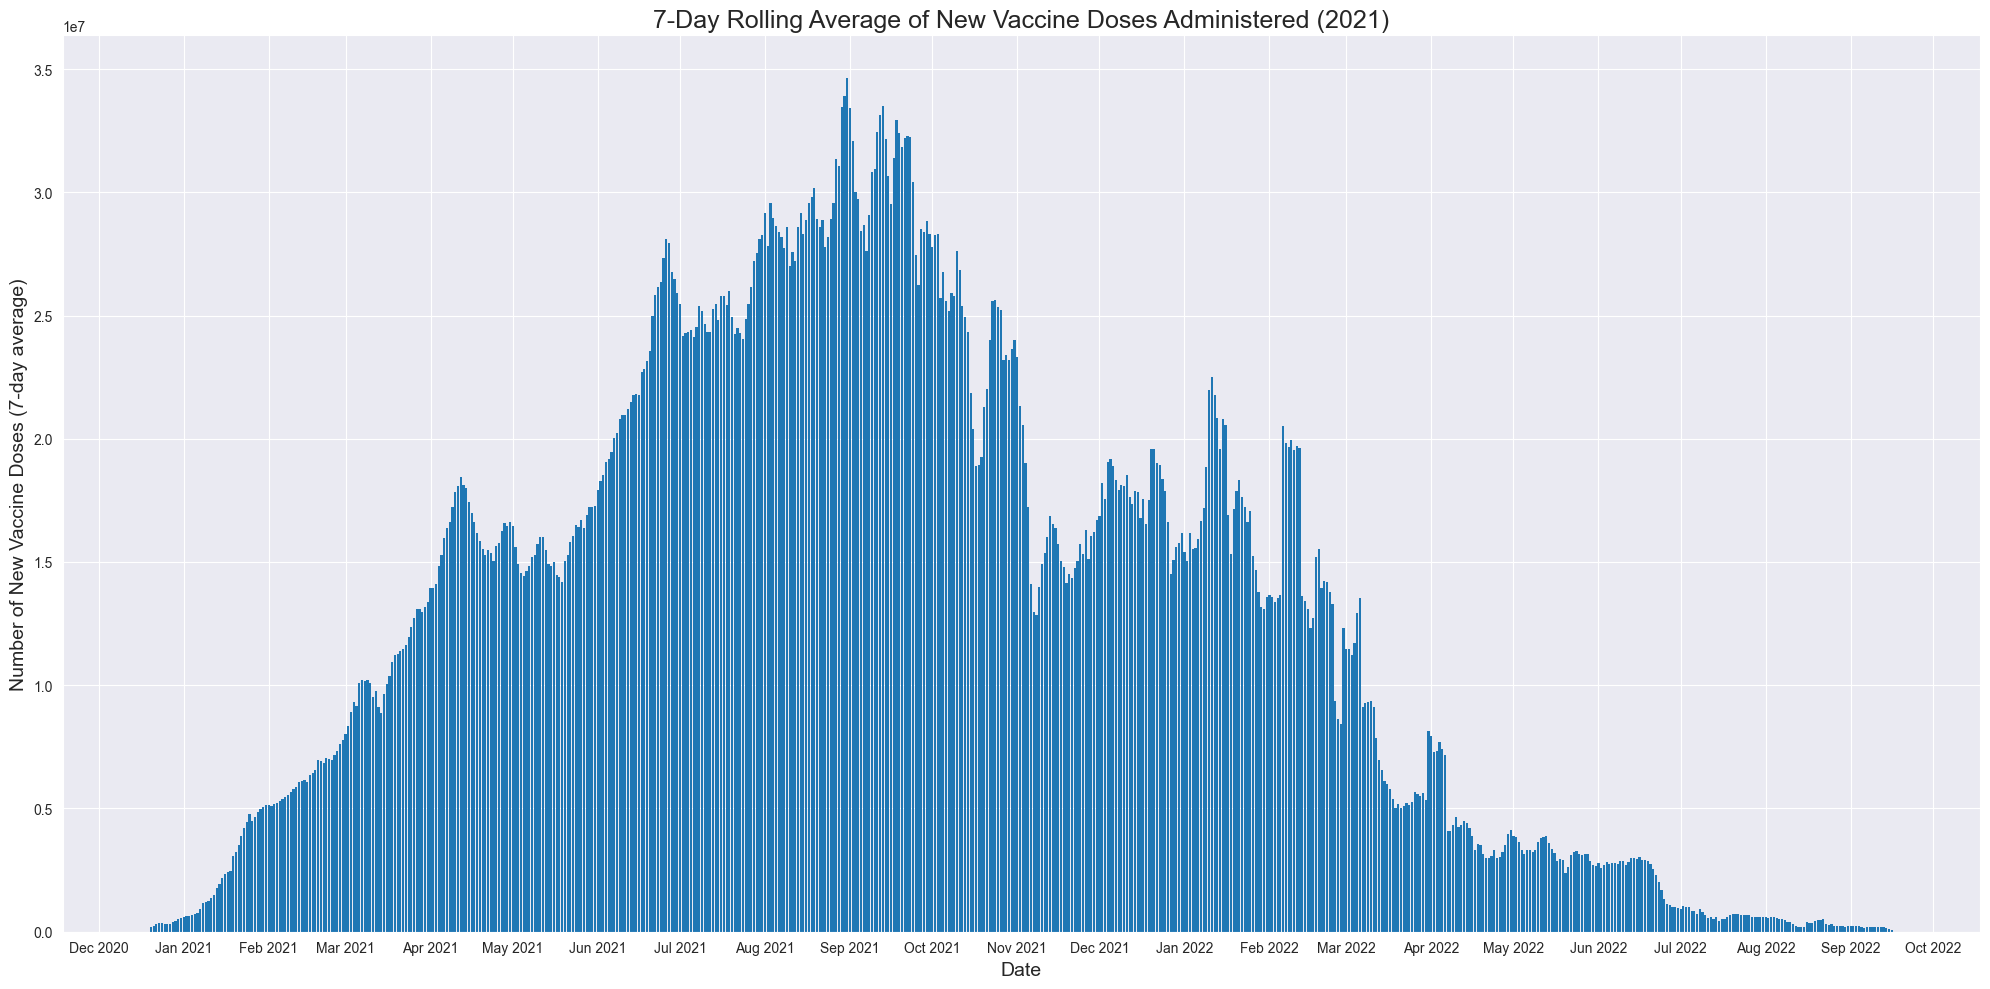

In [122]:
# Calculate 7-day rolling mean for vaccine doses administered
df_daily['rolling_mean_doses'] = df_daily['new_vaccine_doses_administered'].rolling(window=7).mean()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_mean_doses'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Average of New Vaccine Doses Administered (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of New Vaccine Doses (7-day average)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

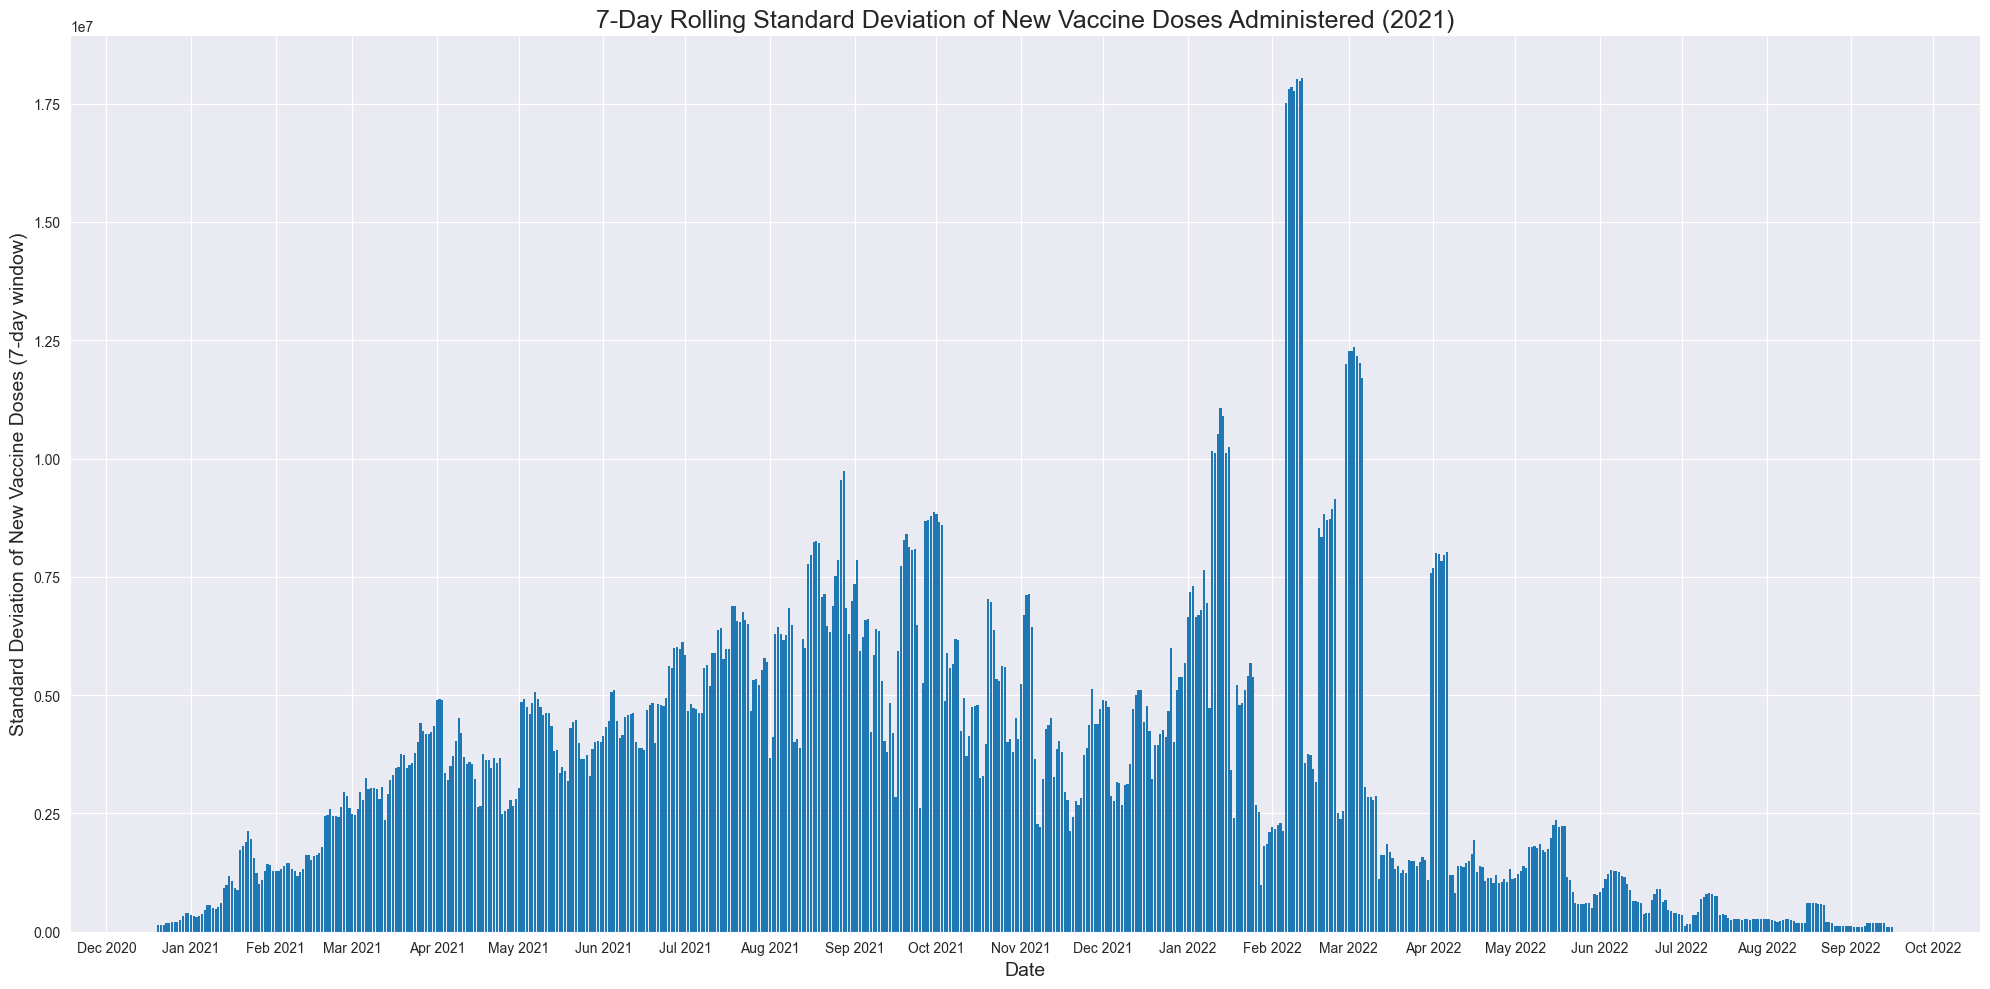

In [123]:
# Calculate 7-day rolling standard deviation for vaccine doses administered
df_daily['rolling_std_doses'] = df_daily['new_vaccine_doses_administered'].rolling(window=7).std()

fig, ax = plt.subplots(figsize=(20, 10))
plt.bar(df_daily['date'], df_daily['rolling_std_doses'], edgecolor='none')

# Add title and axis labels
plt.title('7-Day Rolling Standard Deviation of New Vaccine Doses Administered (2021)', fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Standard Deviation of New Vaccine Doses (7-day window)', fontsize=14)

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()


## Część 2

2.1 Analiza szeregu czasowego liczby nowych zachorowań

2.2 Analiza szeregu czasowego liczby nowych śmierci

2.3 Analiza szeregu czasowego liczby nowych szczepień

2.4 Analiza szeregu czasowego liczby osób w pełni zaszczepionych

2.5 Analiza szeregu czasowego liczby zaaplikowanych szczepionek

## Część 3

3.1 Liczba nowych zachorowań

Training Data Metrics:
MAE: 36874.20
MSE: 1911188359.67
R²: 0.59

Future Data Metrics:
MAE: 1453458.13
MSE: 3096993715630.87
R²: -21.55


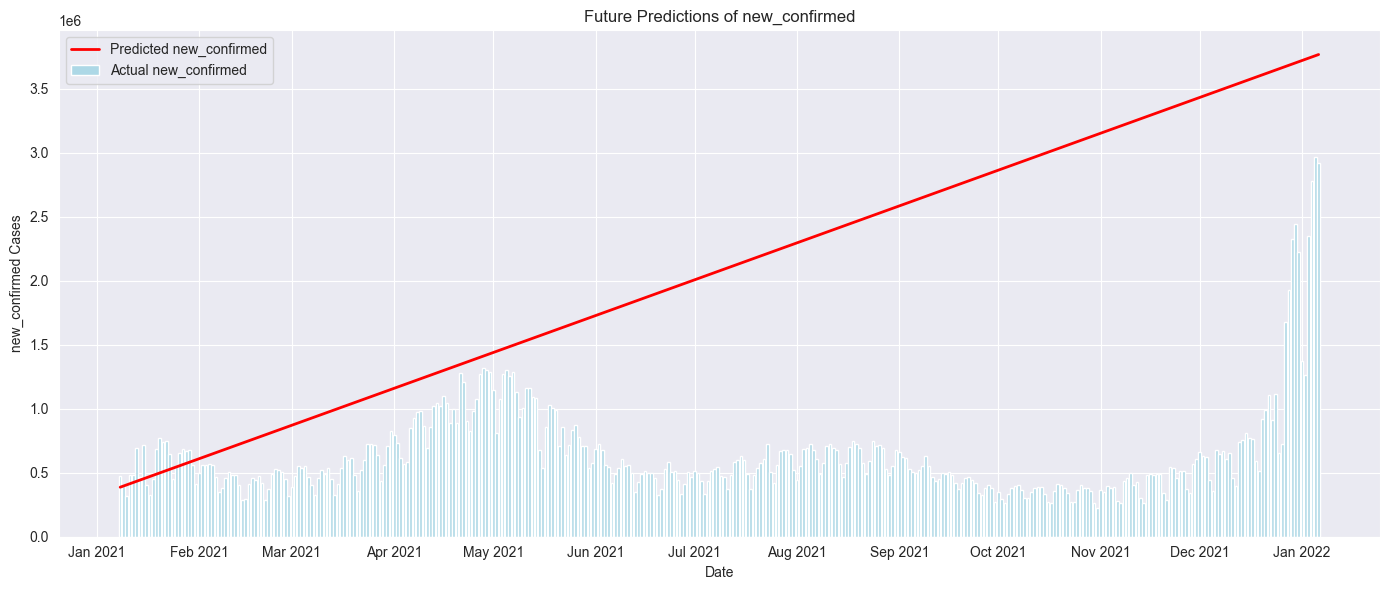


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: -18.21 - MSE: 539923199.33 - MAE: 20988.67
Future Quarter 2020Q4 - R²: -0.86 - MSE: 88209070259.81 - MAE: 250272.49 


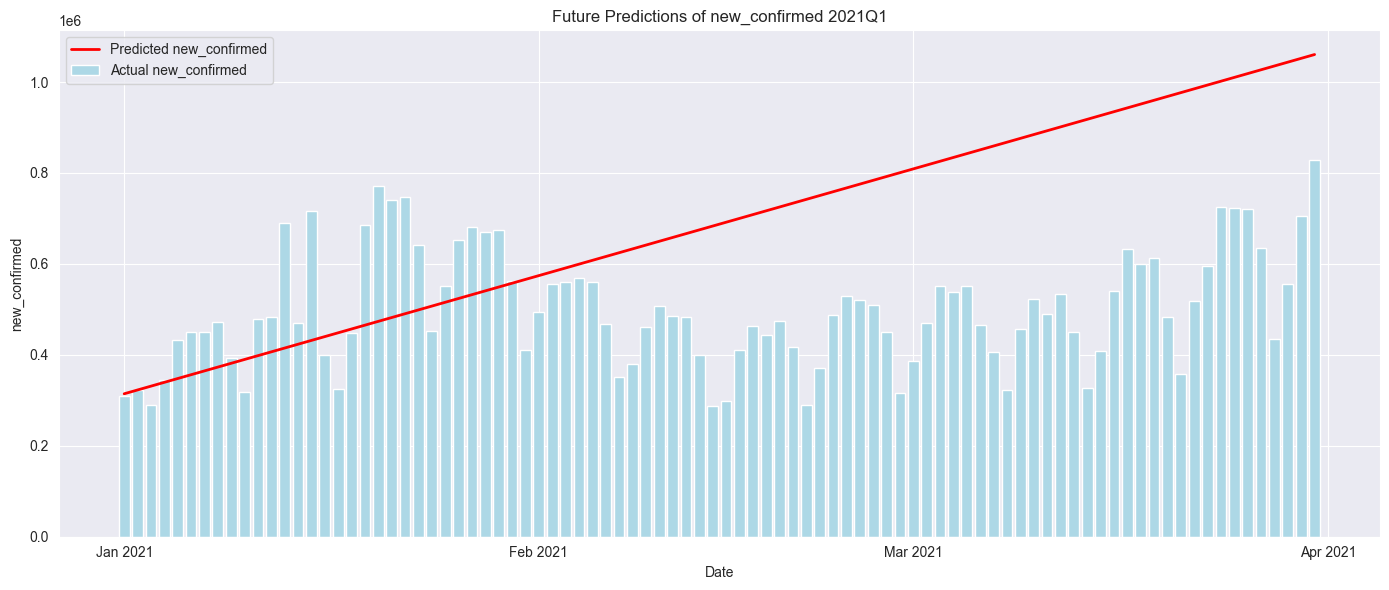

Training Quarter 2021Q1 - R²: -0.23 - MSE: 17854832215.01 - MAE: 102909.61
Future Quarter 2021Q1 - R²: -105.31 - MSE: 126917075508.33 - MAE: 294122.27 


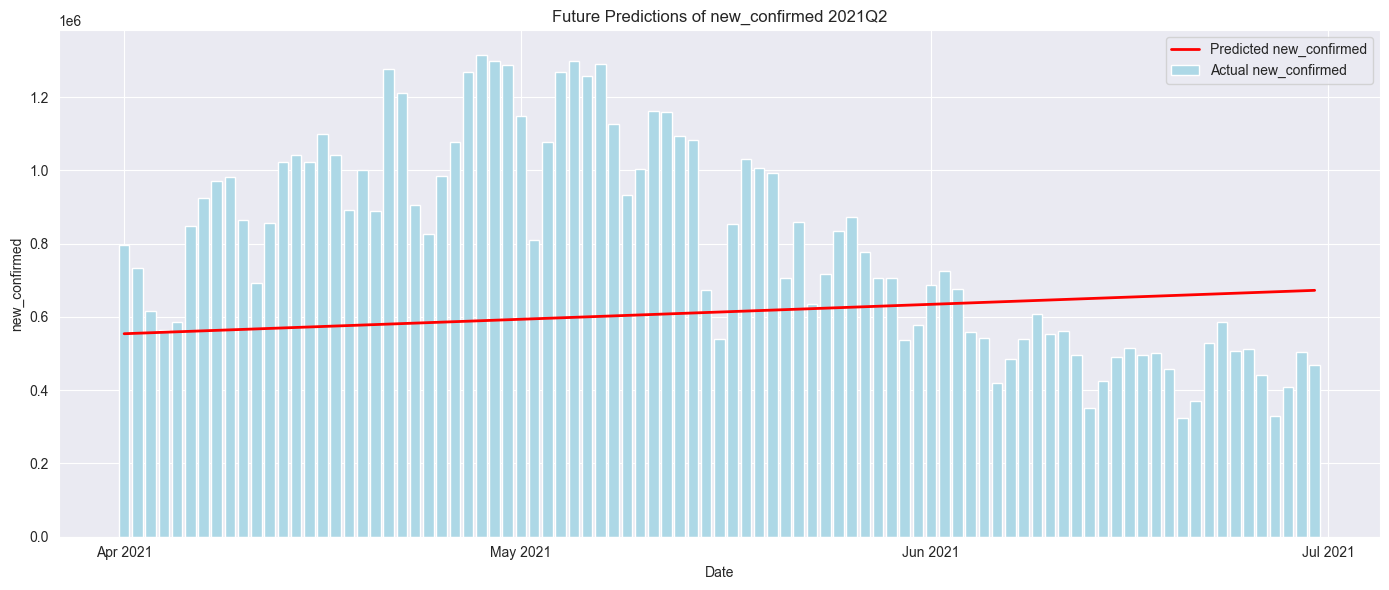

Training Quarter 2021Q2 - R²: 0.18 - MSE: 63178536797.19 - MAE: 200173.89
Future Quarter 2021Q2 - R²: -4.78 - MSE: 226280643918.15 - MAE: 431670.30 


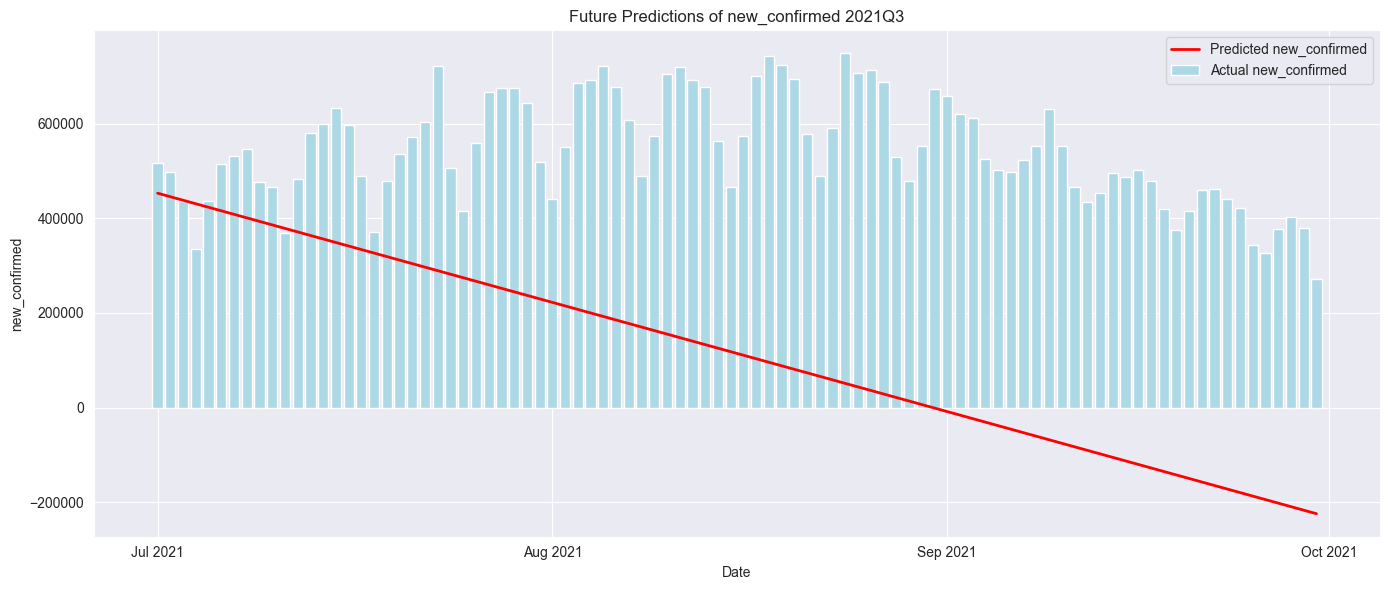

Training Quarter 2021Q3 - R²: -0.10 - MSE: 15025296767.15 - MAE: 104830.71
Future Quarter 2021Q3 - R²: -280.43 - MSE: 209219474770.37 - MAE: 248227.20 


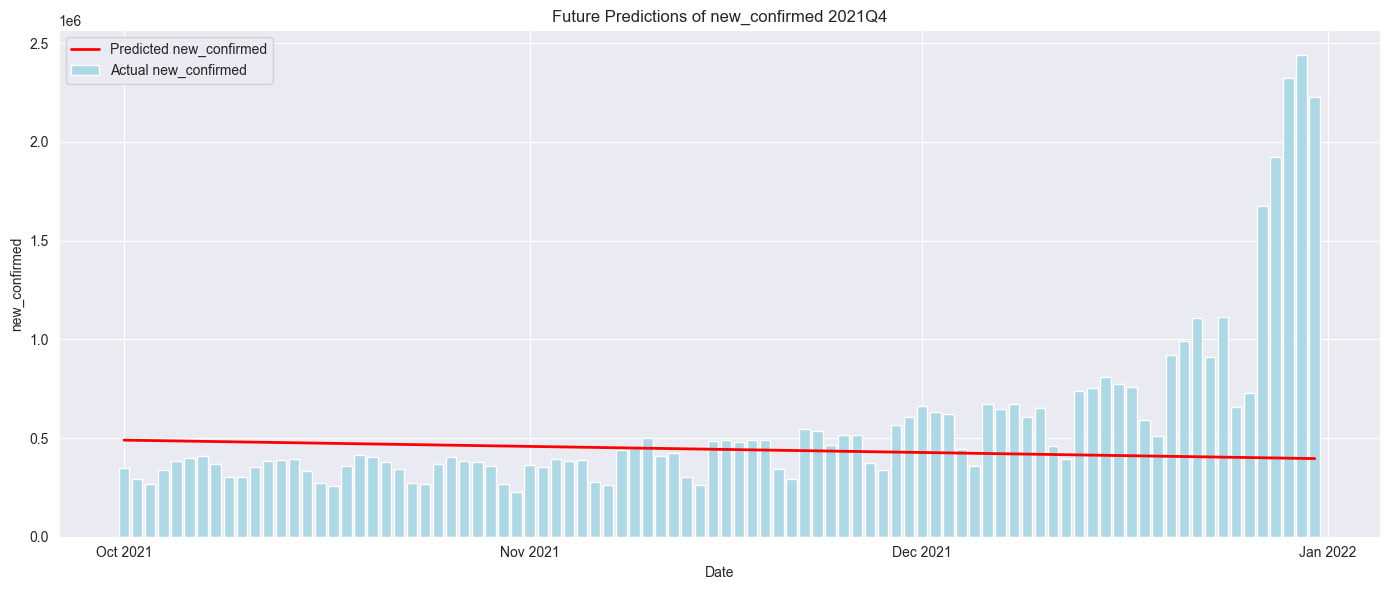

Training Quarter 2021Q4 - R²: 0.39 - MSE: 120338074394.98 - MAE: 197379.27
Future Quarter 2021Q4 - R²: -13.71 - MSE: 1091717635426.95 - MAE: 887159.05 


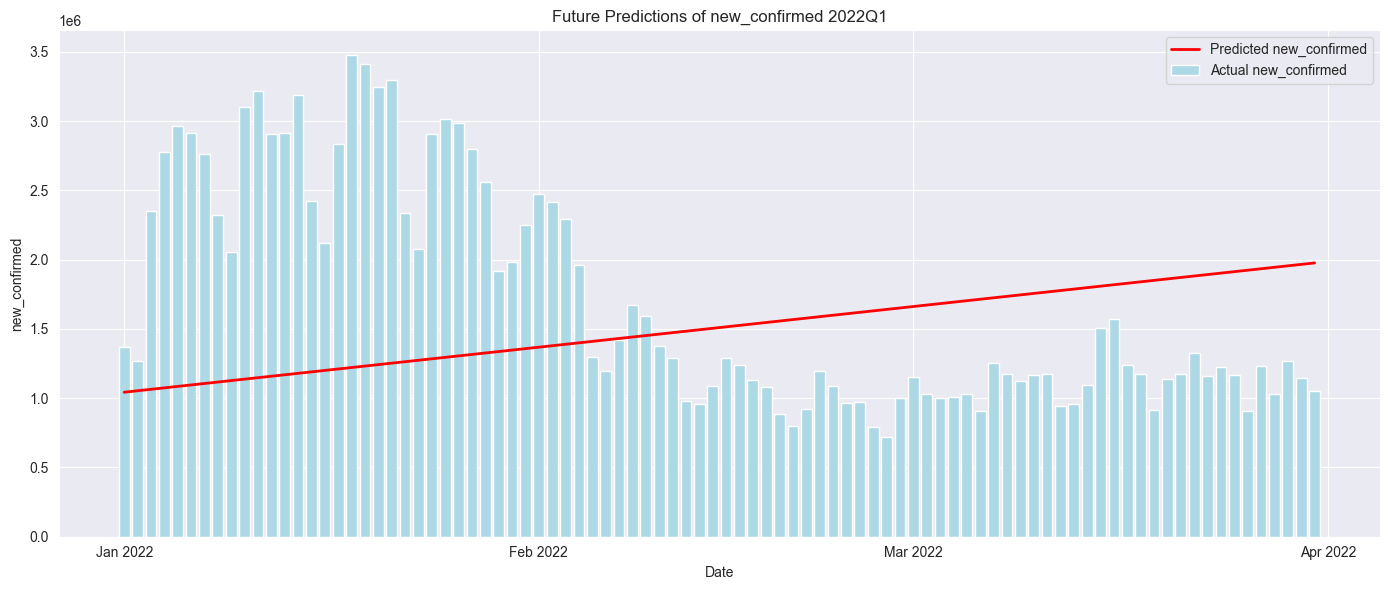

Training Quarter 2022Q1 - R²: 0.52 - MSE: 349166563441.85 - MAE: 488401.81
Future Quarter 2022Q1 - R²: -1.44 - MSE: 925261686790.24 - MAE: 852639.31 


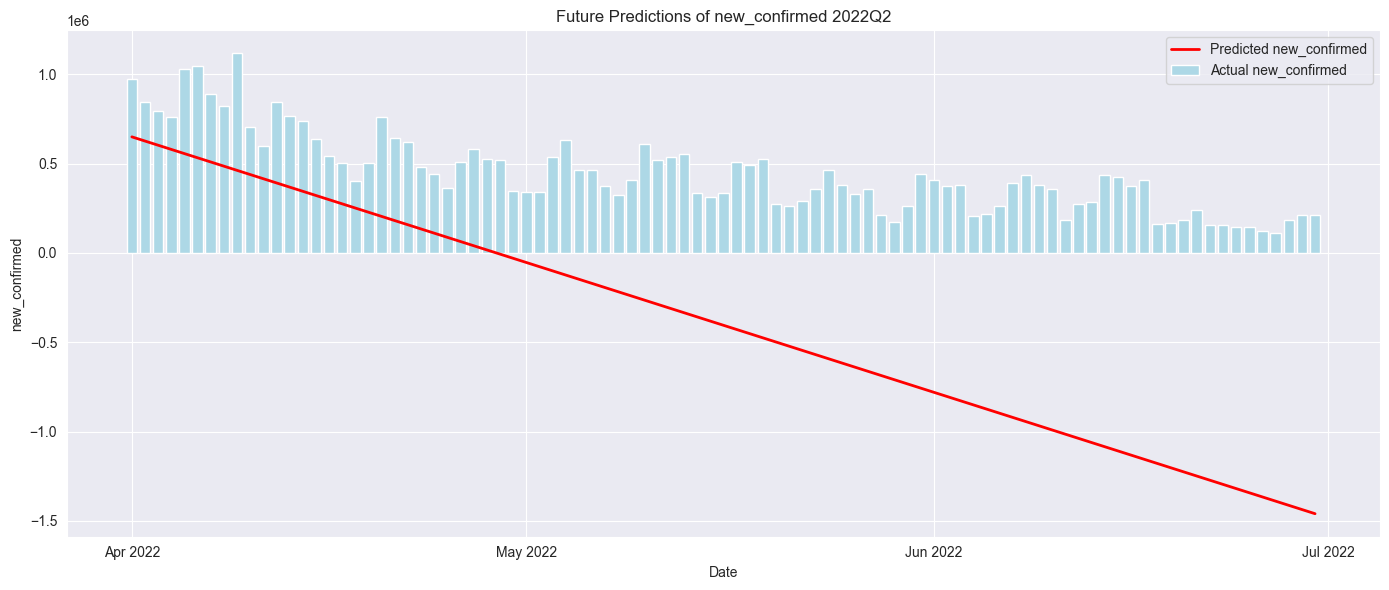

Training Quarter 2022Q2 - R²: 0.75 - MSE: 13731200046.47 - MAE: 93390.96
Future Quarter 2022Q2 - R²: -2.17 - MSE: 77846603216.50 - MAE: 262156.72 


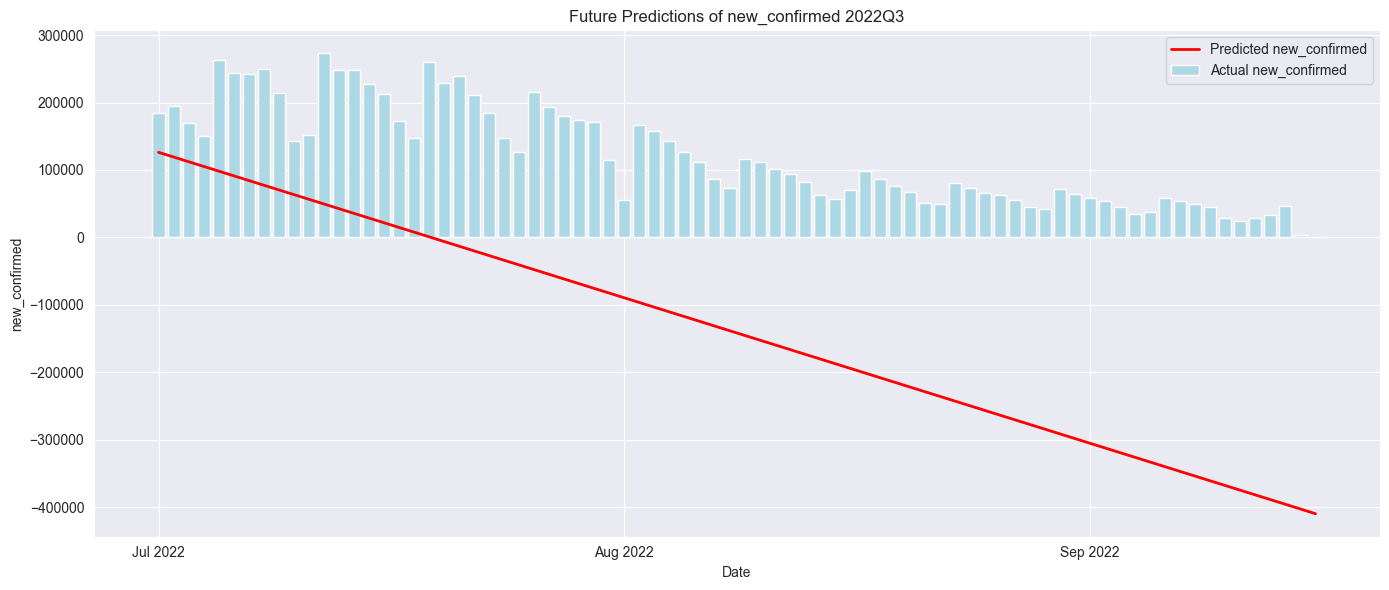

In [124]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = 'new_confirmed'

# Linear regression for new confirmed cases
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)
# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[feature], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df2['date'], df2['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = df_daily['Q'].unique()
training_quarters = quarters[:-1]
future_quarters = quarters[1:]
for quarter, future_quarter in zip(training_quarters, future_quarters):
    quarter_data = df_daily[df_daily['Q'] == quarter]
    future_quarter_data = df_daily[df_daily['Q'] == future_quarter]
    if len(quarter_data) > 10 and len(future_quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data[feature]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Training Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f}")
        y_future_pred = model.predict(future_quarter_data[['data_num']])
        r2 = r2_score(y_future_pred, future_quarter_data[feature])
        mse = mean_squared_error(y_future_pred, future_quarter_data[feature])
        mae = mean_absolute_error(y_future_pred, future_quarter_data[feature])
        print(f"Future Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f} ")

        fig, ax = plt.subplots(figsize=(14, 6))
        plt.bar(df_daily['date'][df_daily['Q'] == future_quarter], df_daily[feature][df_daily['Q'] == future_quarter], color='lightblue', label=f'Actual {feature}')
        plt.plot(df_daily['date'][df_daily['Q'] == future_quarter], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.xlabel('Date')
        plt.ylabel(f'{feature}')
        plt.title(f'Future Predictions of {feature} {future_quarter}')
        plt.legend()
        plt.tight_layout()
        plt.show()

3.2 Liczba nowych śmierci

Training Data Metrics:
MAE: 1152.82
MSE: 1677327.27
R²: 0.47

Future Data Metrics:
MAE: 29430.78
MSE: 1308705921.21
R²: -56.19


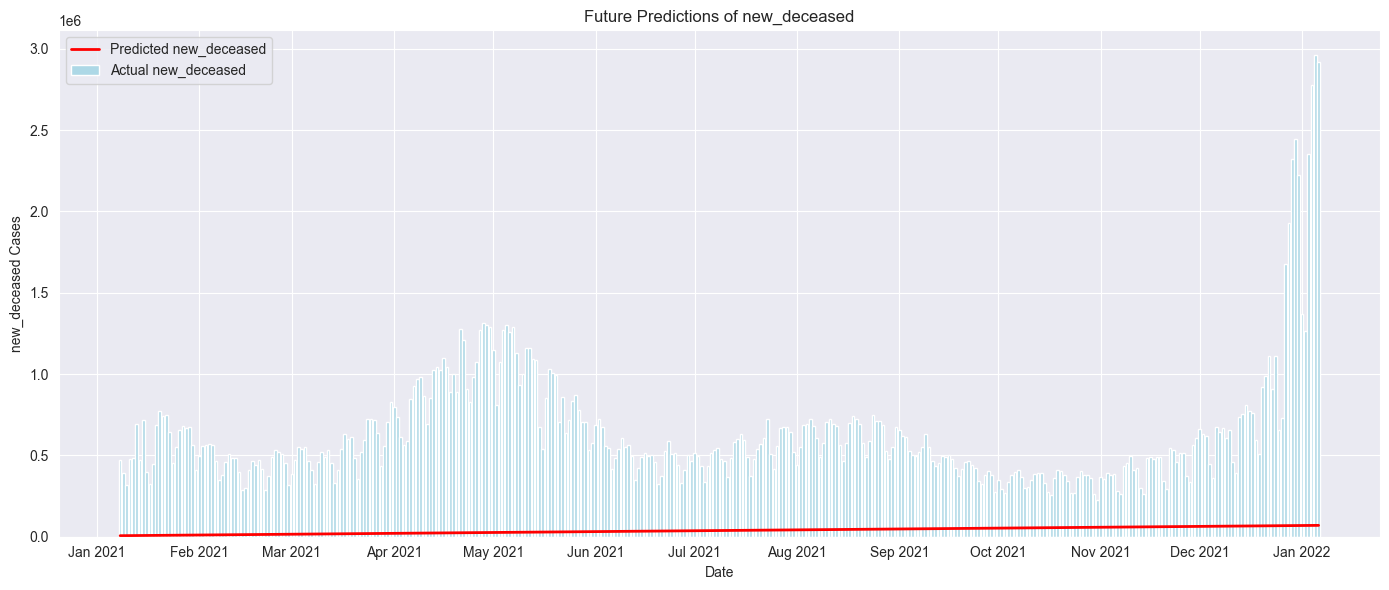


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: -0.85 - MSE: 280557.36 - MAE: 416.43
Future Quarter 2020Q4 - R²: -1.02 - MSE: 67603477.62 - MAE: 6609.58 


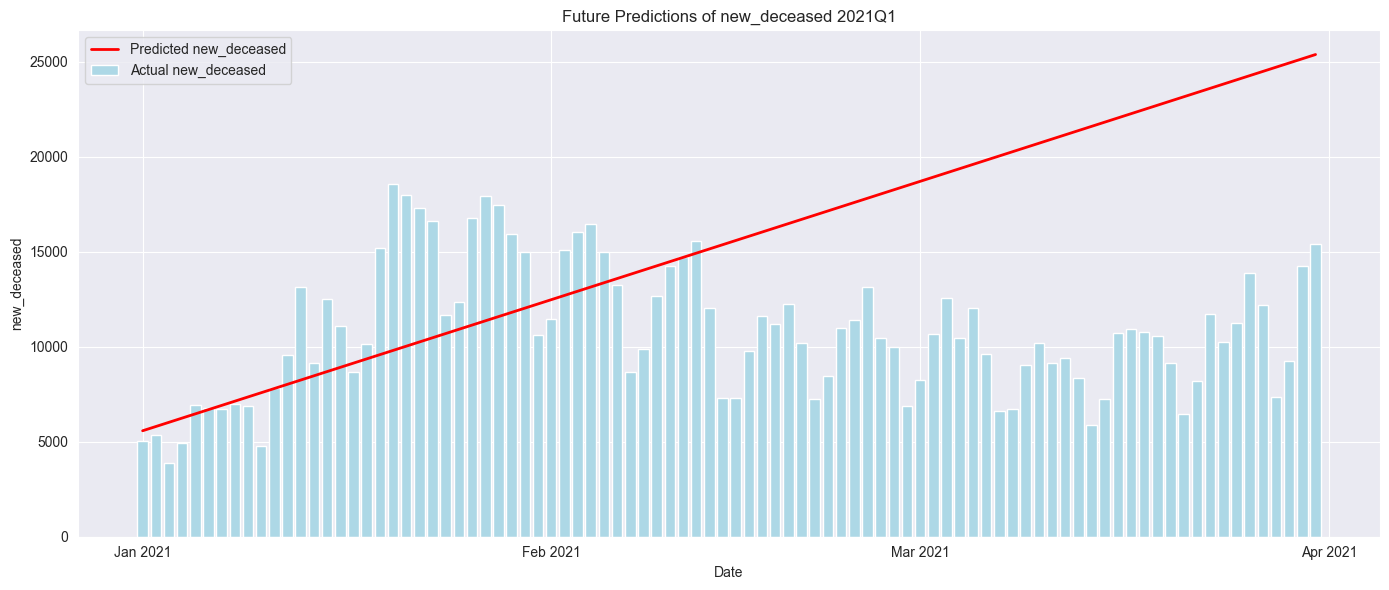

Training Quarter 2021Q1 - R²: -0.05 - MSE: 15680940.87 - MAE: 3533.76
Future Quarter 2021Q1 - R²: -2171.12 - MSE: 25219034.10 - MAE: 4198.33 


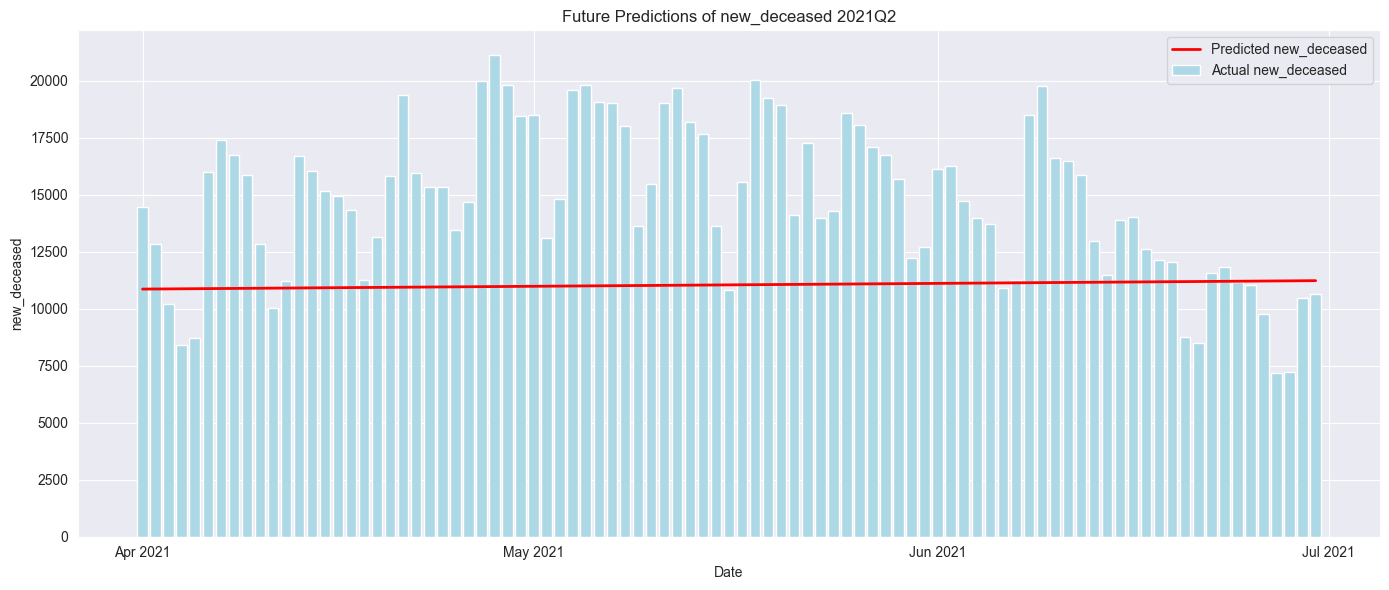

Training Quarter 2021Q2 - R²: 0.01 - MSE: 14392791.87 - MAE: 3267.24
Future Quarter 2021Q2 - R²: -10.69 - MSE: 12556730.96 - MAE: 3302.75 


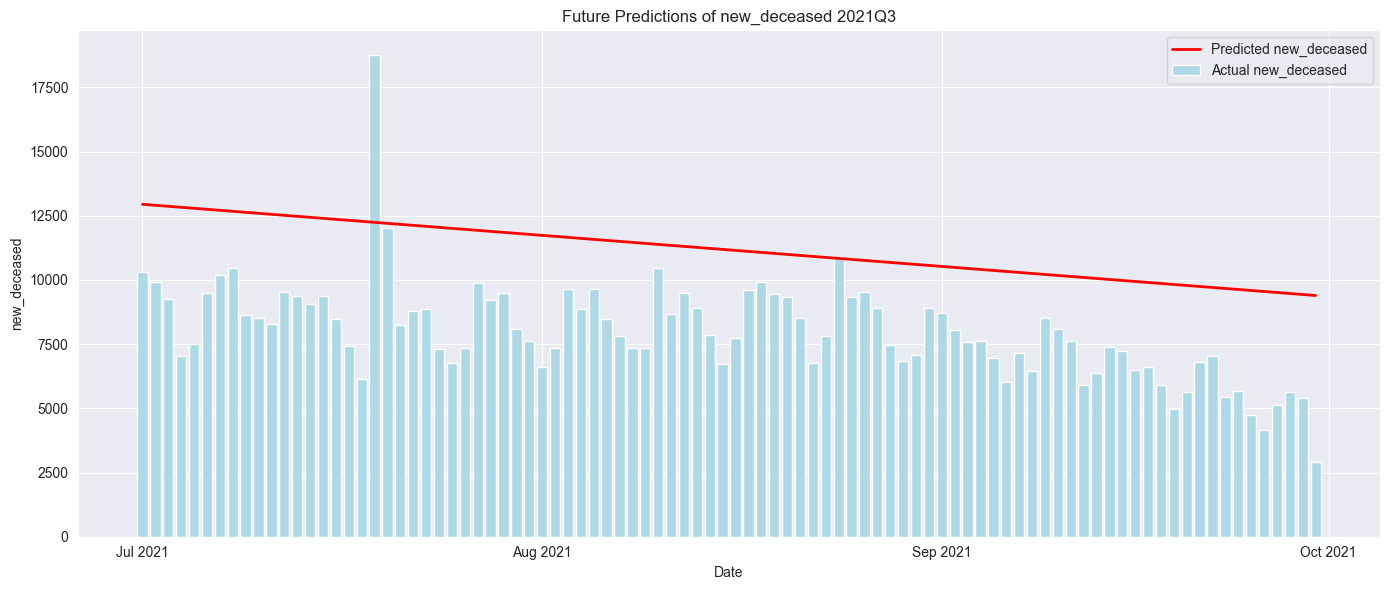

Training Quarter 2021Q3 - R²: 0.06 - MSE: 6613003.93 - MAE: 1521.23
Future Quarter 2021Q3 - R²: -0.78 - MSE: 2018926.59 - MAE: 1161.90 


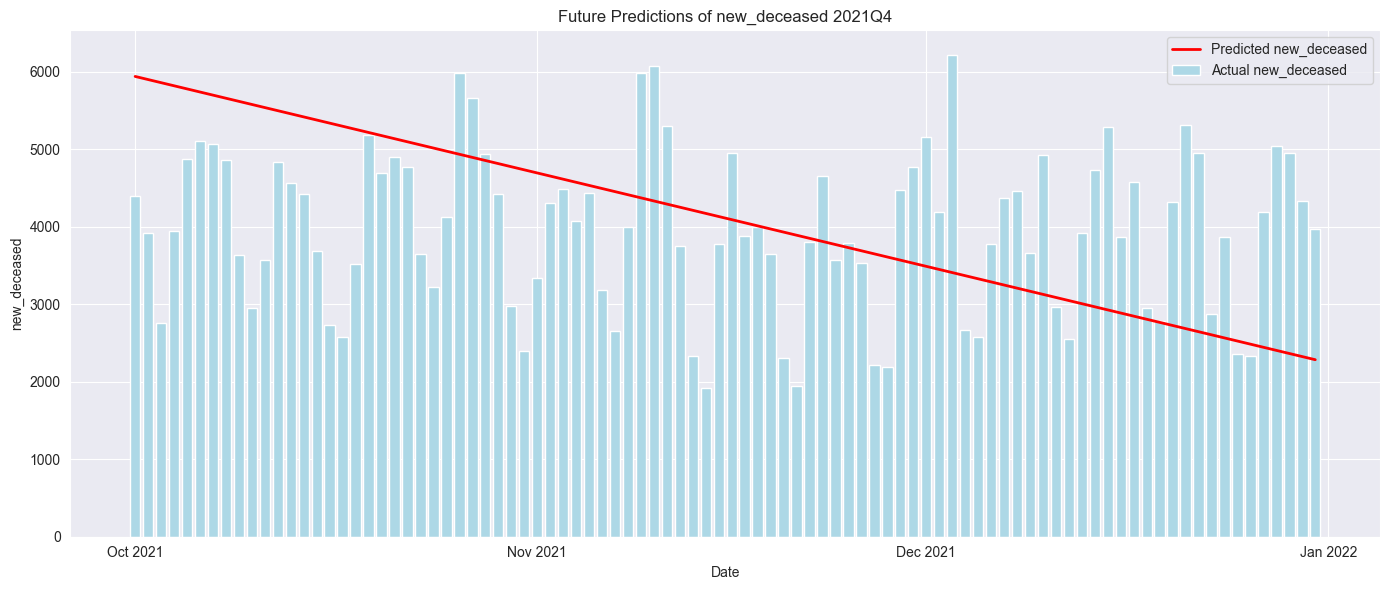

Training Quarter 2021Q4 - R²: -0.11 - MSE: 1281964.35 - MAE: 924.28
Future Quarter 2021Q4 - R²: -141063.19 - MSE: 6953516.32 - MAE: 2053.71 


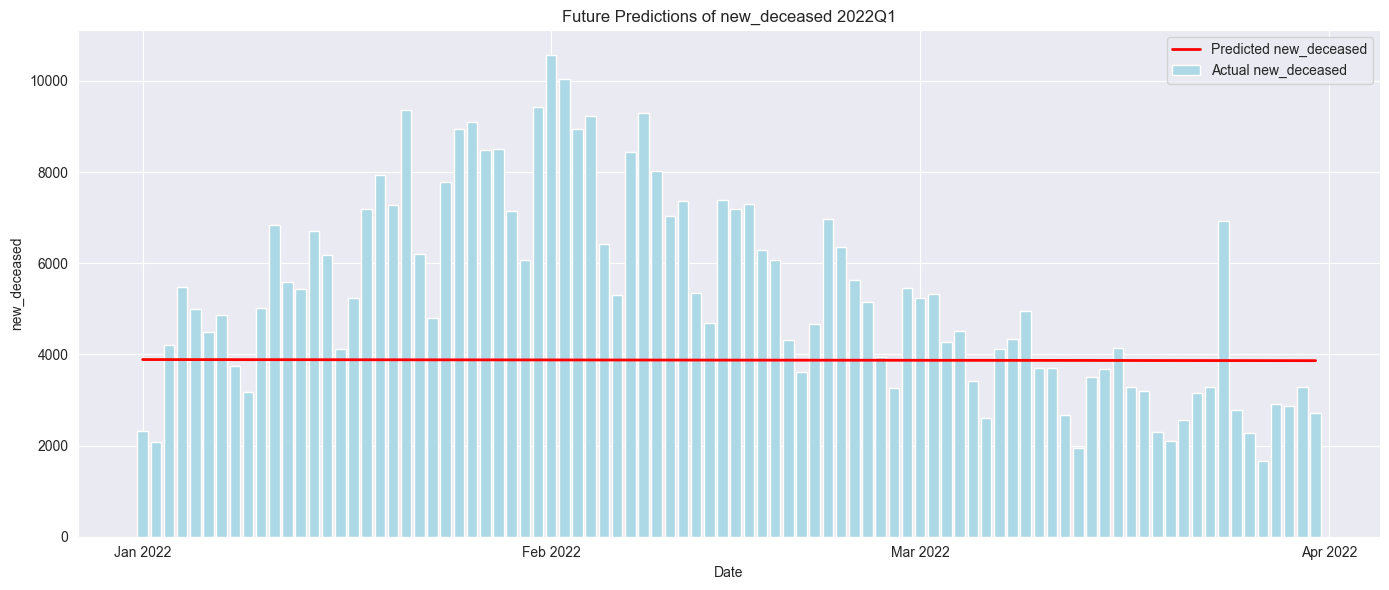

Training Quarter 2022Q1 - R²: 0.13 - MSE: 3256388.88 - MAE: 1427.80
Future Quarter 2022Q1 - R²: 0.69 - MSE: 387995.82 - MAE: 510.73 


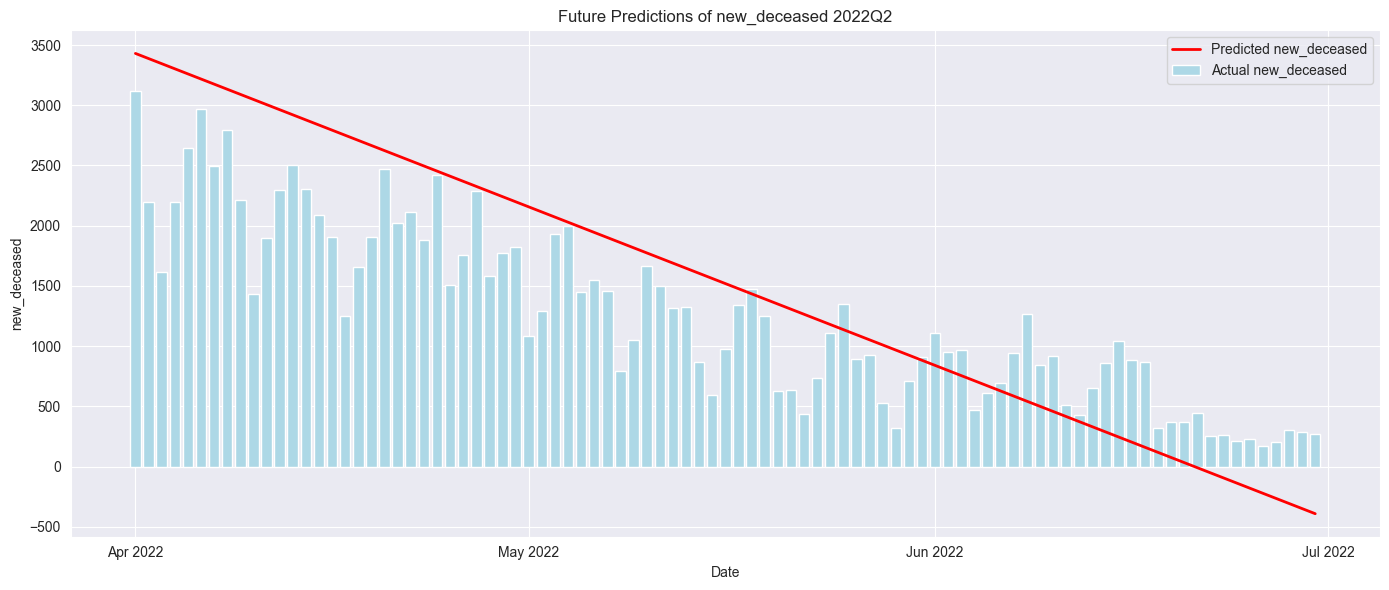

Training Quarter 2022Q2 - R²: 0.81 - MSE: 124749.08 - MAE: 265.50
Future Quarter 2022Q2 - R²: -4.27 - MSE: 1534573.05 - MAE: 1140.43 


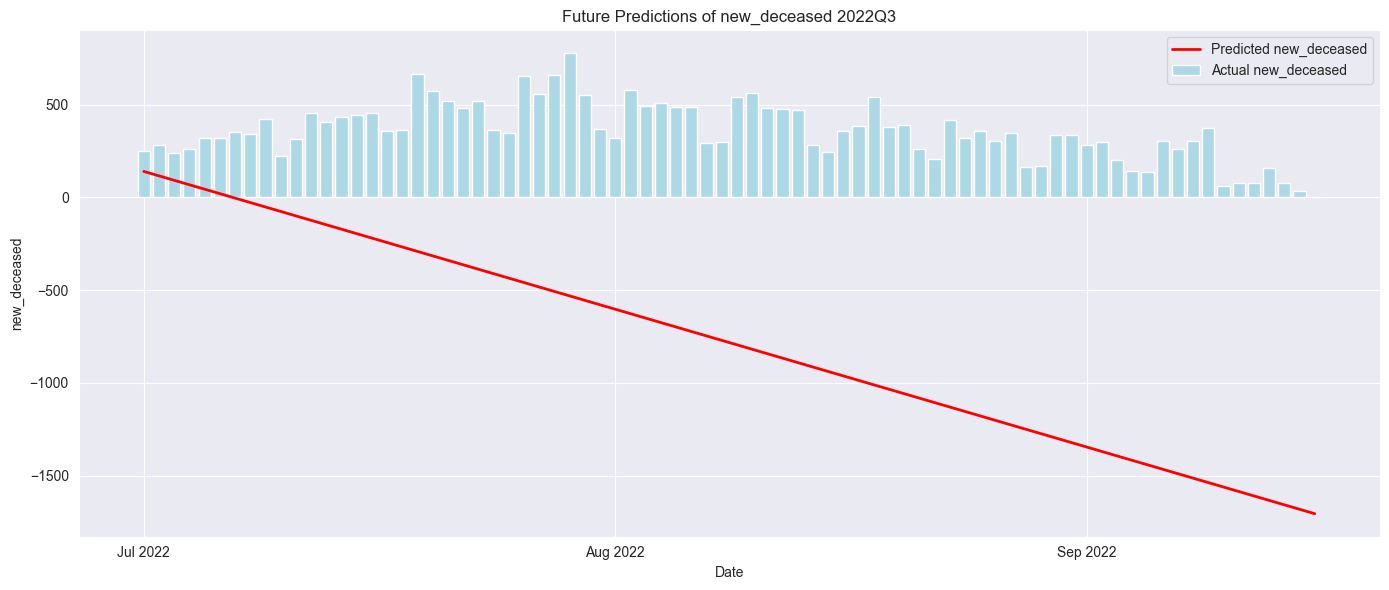

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = 'new_deceased'

# Linear regression for new confirmed cases
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)
# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[feature], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df2['date'], df2['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = df_daily['Q'].unique()
training_quarters = quarters[:-1]
future_quarters = quarters[1:]
for quarter, future_quarter in zip(training_quarters, future_quarters):
    quarter_data = df_daily[df_daily['Q'] == quarter]
    future_quarter_data = df_daily[df_daily['Q'] == future_quarter]
    if len(quarter_data) > 10 and len(future_quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data[feature]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Training Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f}")
        y_future_pred = model.predict(future_quarter_data[['data_num']])
        r2 = r2_score(y_future_pred, future_quarter_data[feature])
        mse = mean_squared_error(y_future_pred, future_quarter_data[feature])
        mae = mean_absolute_error(y_future_pred, future_quarter_data[feature])
        print(f"Future Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f} ")

        fig, ax = plt.subplots(figsize=(14, 6))
        plt.bar(df_daily['date'][df_daily['Q'] == future_quarter], df_daily[feature][df_daily['Q'] == future_quarter], color='lightblue', label=f'Actual {feature}')
        plt.plot(df_daily['date'][df_daily['Q'] == future_quarter], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.xlabel('Date')
        plt.ylabel(f'{feature}')
        plt.title(f'Future Predictions of {feature} {future_quarter}')
        plt.legend()
        plt.tight_layout()
        plt.show()

3.3 Liczba nowych szczepień

Training Data Metrics:
MAE: 214288.60
MSE: 62447624014.79
R²: 0.42

Future Data Metrics:
MAE: 5922775.93
MSE: 48938234253923.94
R²: -0.46


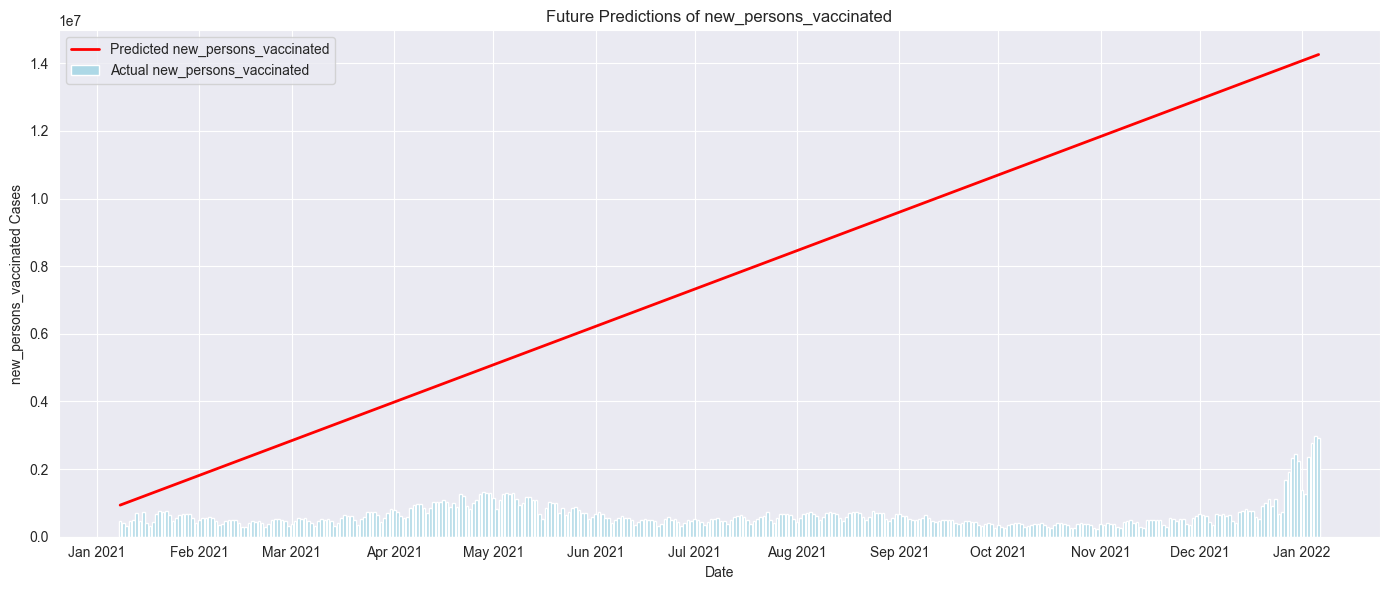


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: 0.83 - MSE: 6203991224.76 - MAE: 72362.25
Future Quarter 2020Q4 - R²: -11.66 - MSE: 12474386055491.42 - MAE: 2701511.07 


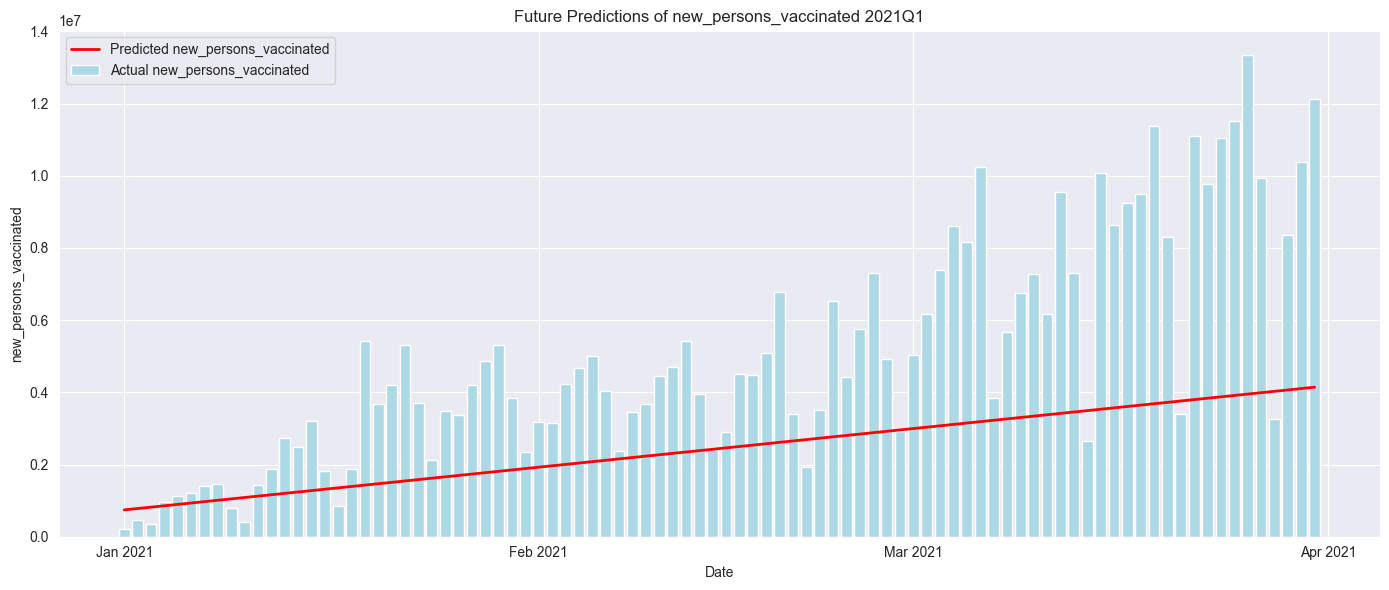

Training Quarter 2021Q1 - R²: 0.28 - MSE: 4582944458346.64 - MAE: 1526970.02
Future Quarter 2021Q1 - R²: -1.35 - MSE: 18818309856455.13 - MAE: 3611094.15 


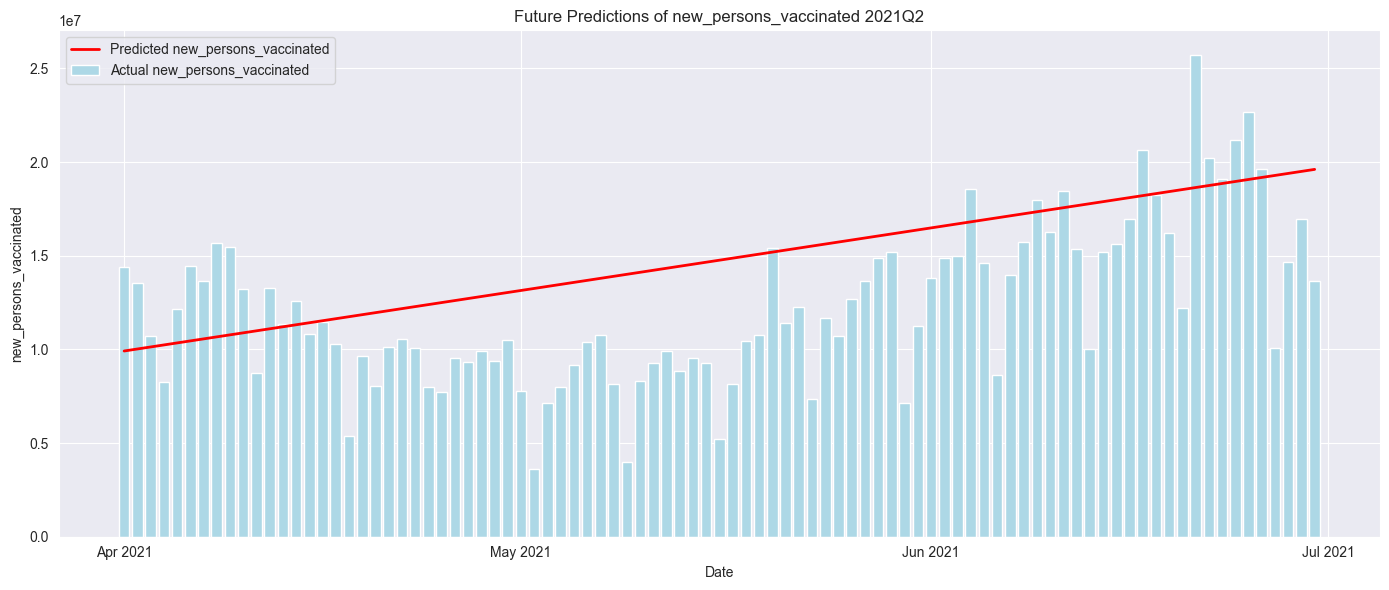

Training Quarter 2021Q2 - R²: 0.27 - MSE: 9299928299521.06 - MAE: 2366934.65
Future Quarter 2021Q2 - R²: -5.32 - MSE: 35040156477358.28 - MAE: 4791110.41 


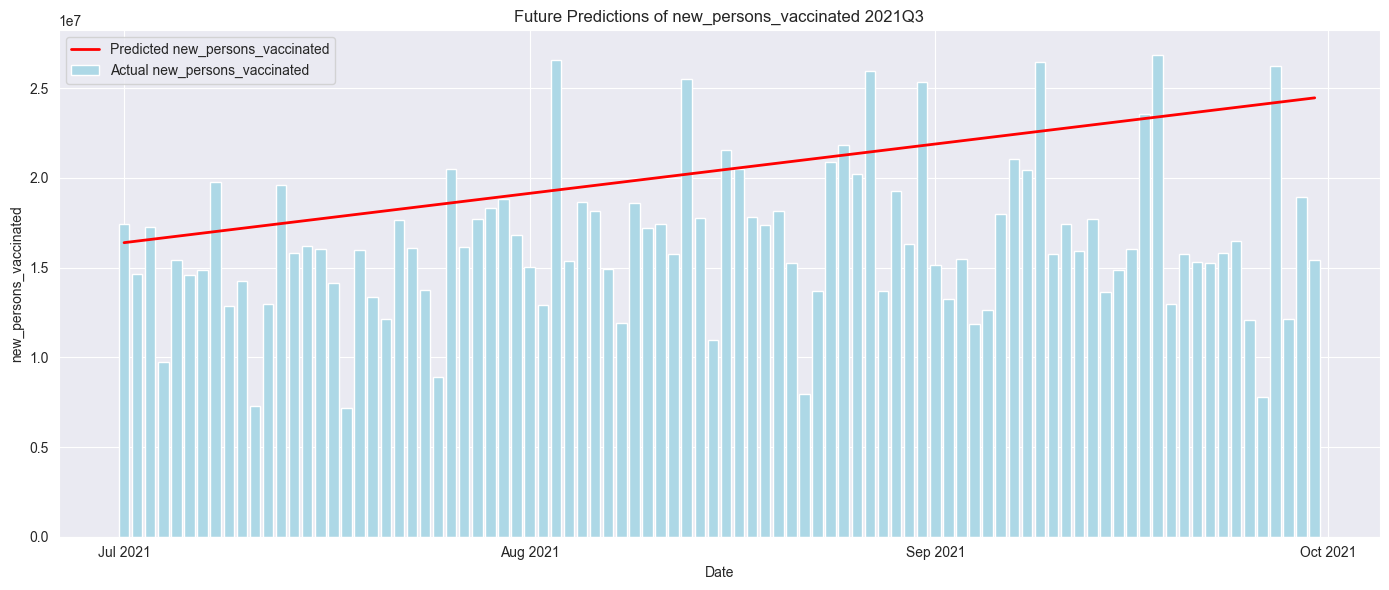

Training Quarter 2021Q3 - R²: -0.10 - MSE: 9575305697096.64 - MAE: 2300650.71
Future Quarter 2021Q3 - R²: -179.94 - MSE: 169527486721054.44 - MAE: 12267883.92 


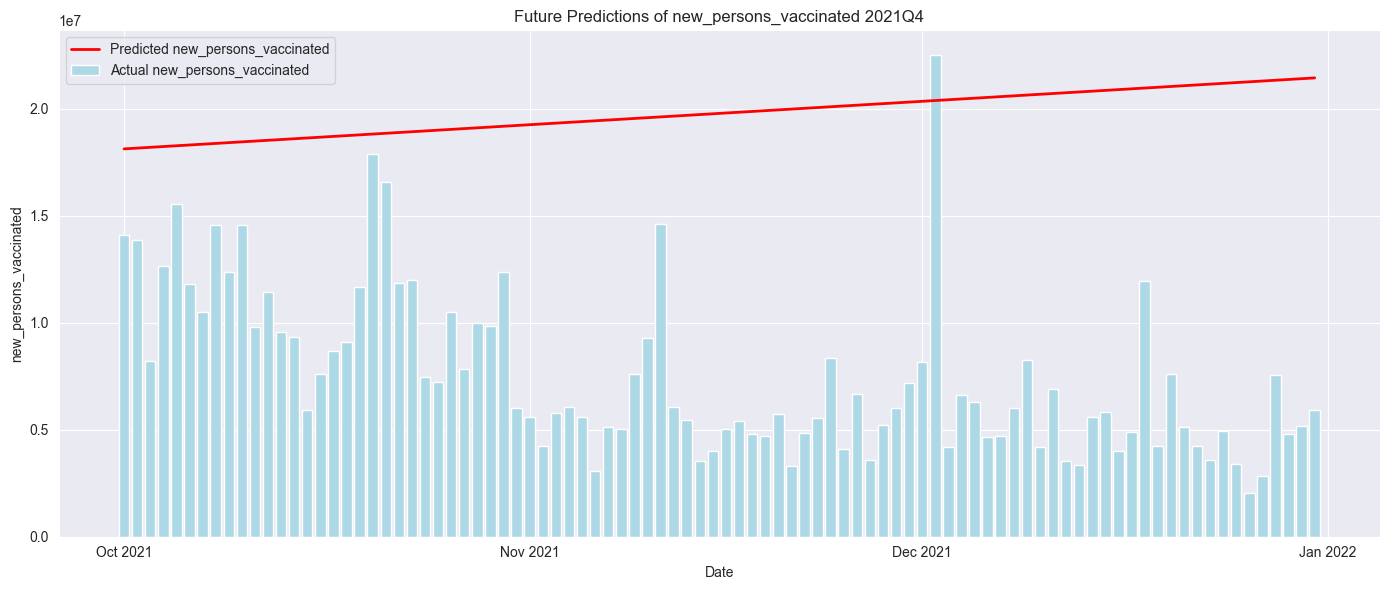

Training Quarter 2021Q4 - R²: 0.20 - MSE: 18954939763996.48 - MAE: 2627932.95
Future Quarter 2021Q4 - R²: -4.40 - MSE: 24116762205087.86 - MAE: 3830117.71 


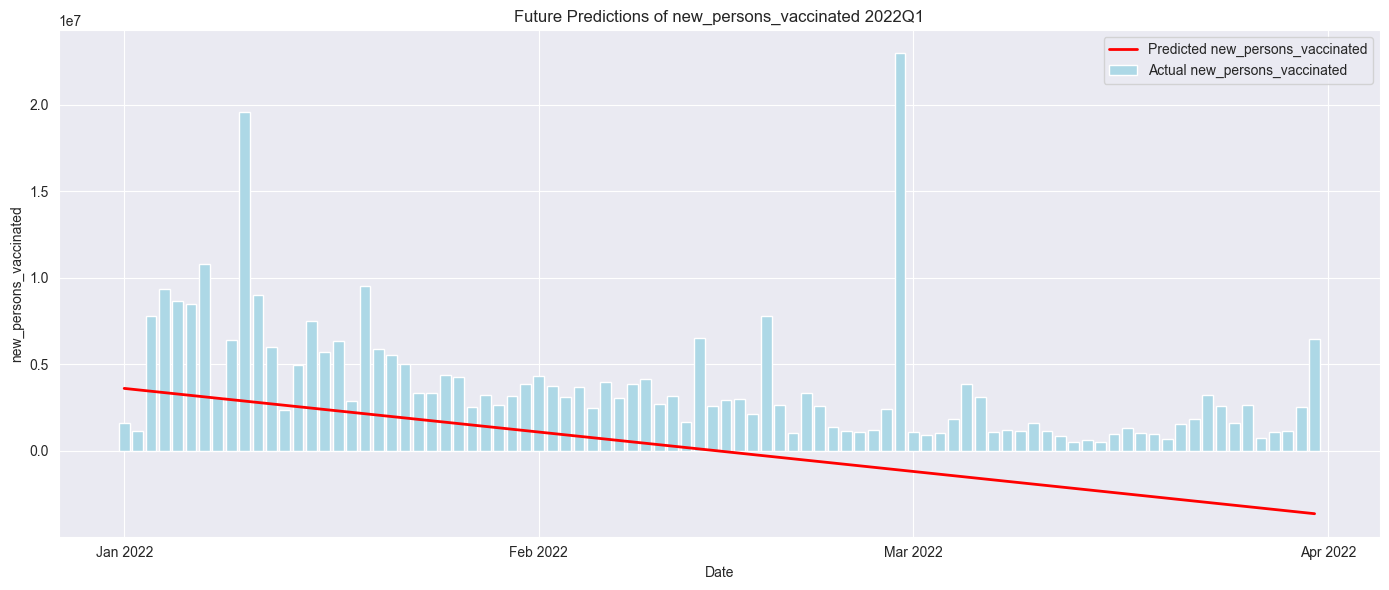

Training Quarter 2022Q1 - R²: 0.18 - MSE: 6050845414139.12 - MAE: 2134942.28
Future Quarter 2022Q1 - R²: -2.17 - MSE: 9850681666332.56 - MAE: 2723649.29 


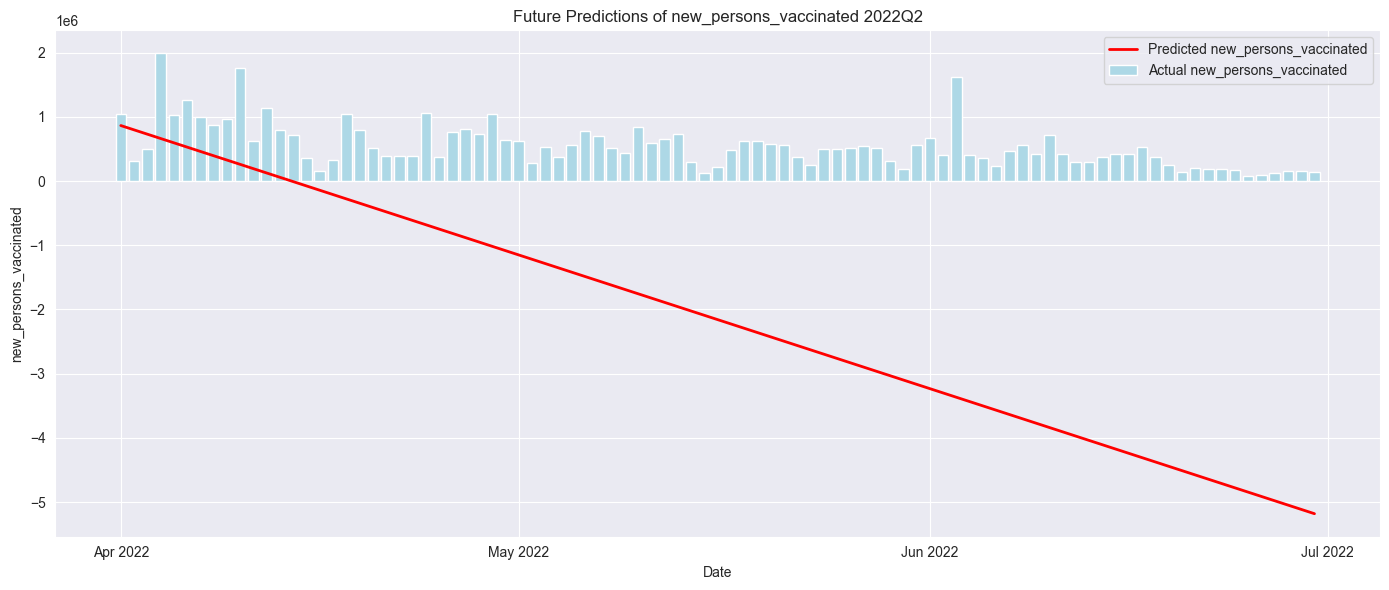

Training Quarter 2022Q2 - R²: 0.52 - MSE: 42954736399.65 - MAE: 163520.08
Future Quarter 2022Q2 - R²: -0.94 - MSE: 55384437816.74 - MAE: 210925.05 


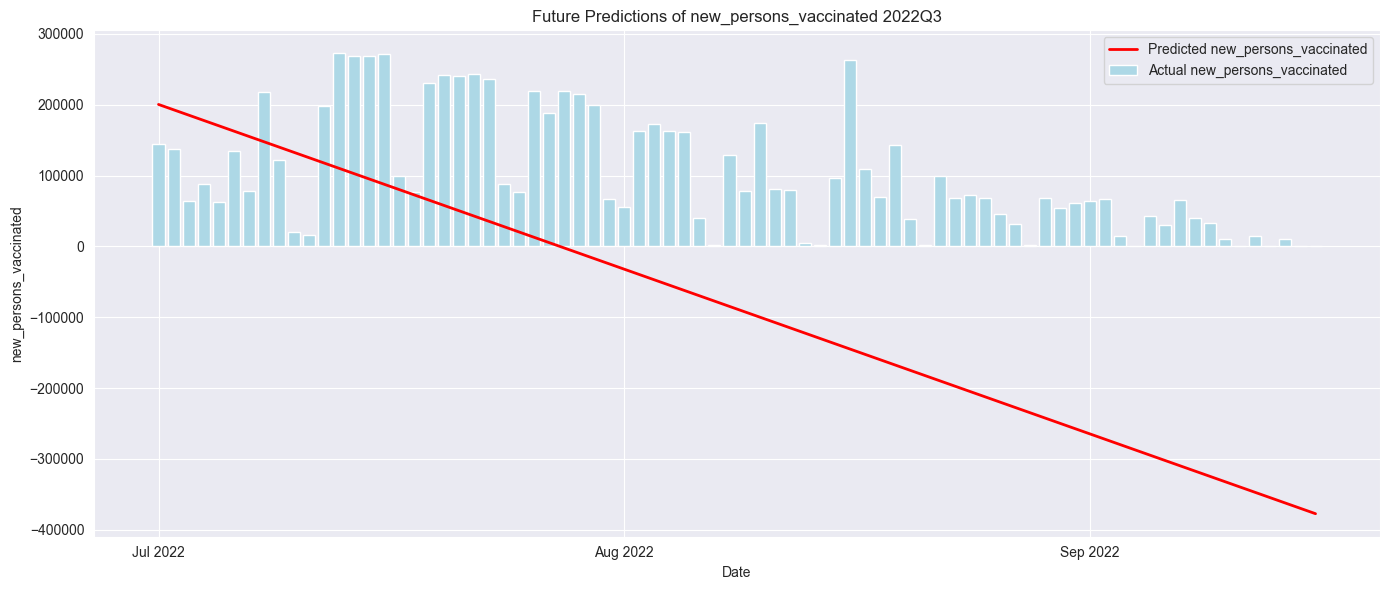

In [126]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = 'new_persons_vaccinated'

# Linear regression for new confirmed cases
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)
# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[feature], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df2['date'], df2['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = df_daily['Q'].unique()
training_quarters = quarters[:-1]
future_quarters = quarters[1:]
for quarter, future_quarter in zip(training_quarters, future_quarters):
    quarter_data = df_daily[df_daily['Q'] == quarter]
    future_quarter_data = df_daily[df_daily['Q'] == future_quarter]
    if len(quarter_data) > 10 and len(future_quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data[feature]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Training Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f}")
        y_future_pred = model.predict(future_quarter_data[['data_num']])
        r2 = r2_score(y_future_pred, future_quarter_data[feature])
        mse = mean_squared_error(y_future_pred, future_quarter_data[feature])
        mae = mean_absolute_error(y_future_pred, future_quarter_data[feature])
        print(f"Future Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f} ")

        fig, ax = plt.subplots(figsize=(14, 6))
        plt.bar(df_daily['date'][df_daily['Q'] == future_quarter], df_daily[feature][df_daily['Q'] == future_quarter], color='lightblue', label=f'Actual {feature}')
        plt.plot(df_daily['date'][df_daily['Q'] == future_quarter], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.xlabel('Date')
        plt.ylabel(f'{feature}')
        plt.title(f'Future Predictions of {feature} {future_quarter}')
        plt.legend()
        plt.tight_layout()
        plt.show()

3.4.1 Liczba osób w pełni zaszczepionych

Training Data Metrics:
MAE: 11449.39
MSE: 170023052.66
R²: -911.68

Future Data Metrics:
MAE: 7044872.15
MSE: 67322542103124.86
R²: -2.44


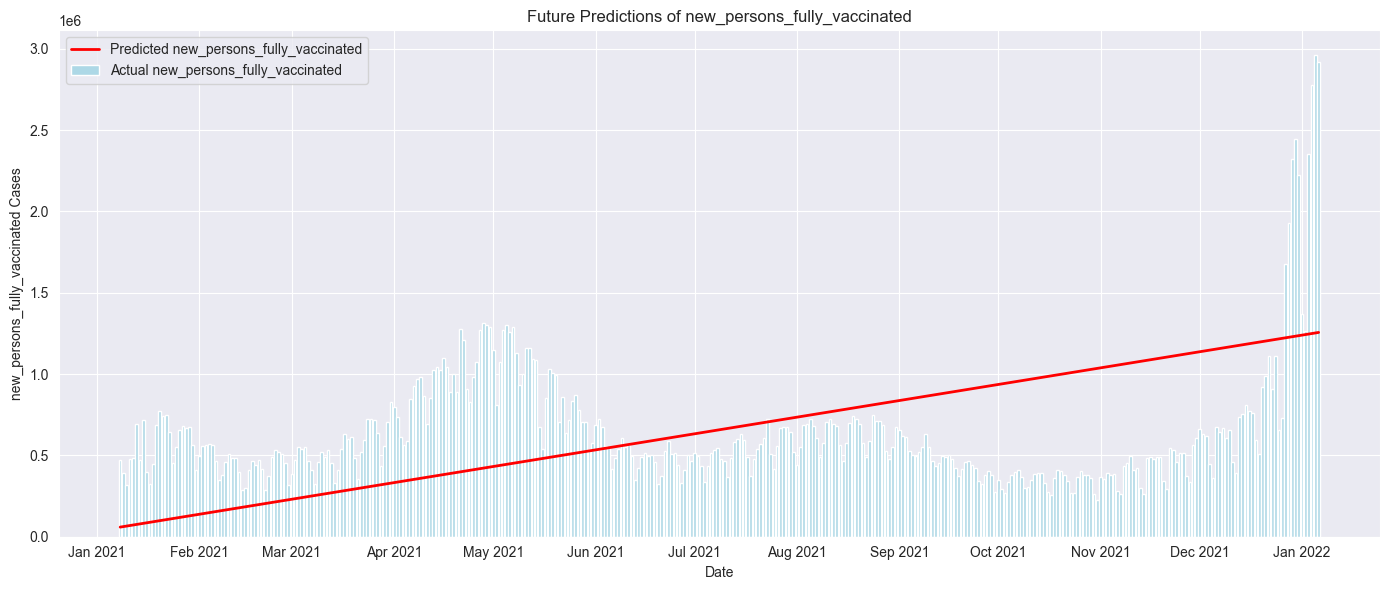


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: 0.44 - MSE: 715200.40 - MAE: 770.55
Future Quarter 2020Q4 - R²: -87065.90 - MSE: 5531791621435.72 - MAE: 1954447.80 


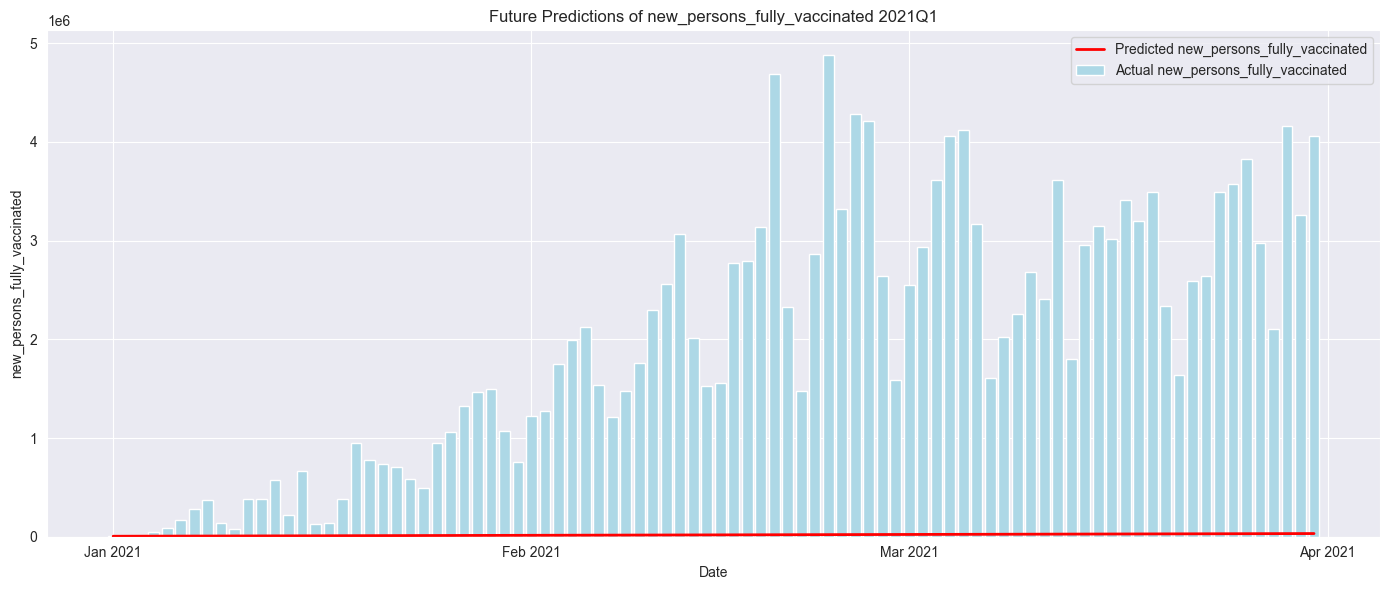

Training Quarter 2021Q1 - R²: 0.55 - MSE: 720094059908.05 - MAE: 594696.32
Future Quarter 2021Q1 - R²: -1.62 - MSE: 3311093618580.23 - MAE: 1472506.80 


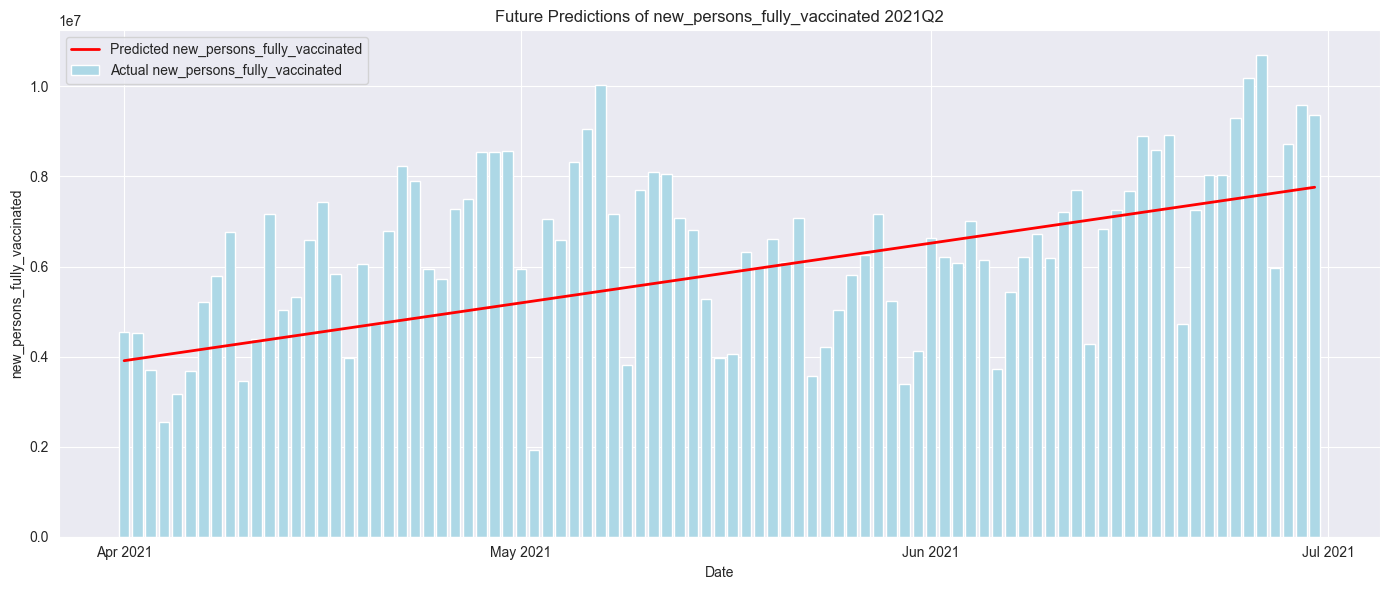

Training Quarter 2021Q2 - R²: 0.15 - MSE: 3035073754147.88 - MAE: 1468484.00
Future Quarter 2021Q2 - R²: -29.20 - MSE: 17614615946646.23 - MAE: 3672421.11 


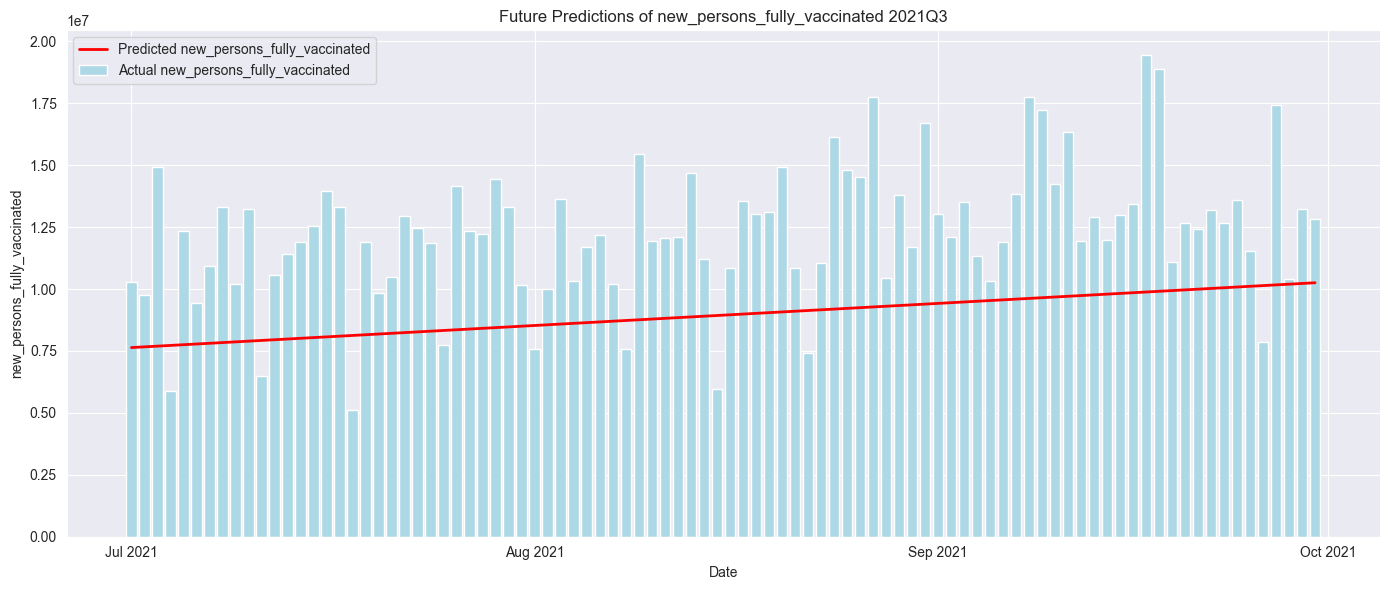

Training Quarter 2021Q3 - R²: 0.09 - MSE: 4008715379244.31 - MAE: 1505035.75
Future Quarter 2021Q3 - R²: -46.81 - MSE: 52653693028681.95 - MAE: 6410054.44 


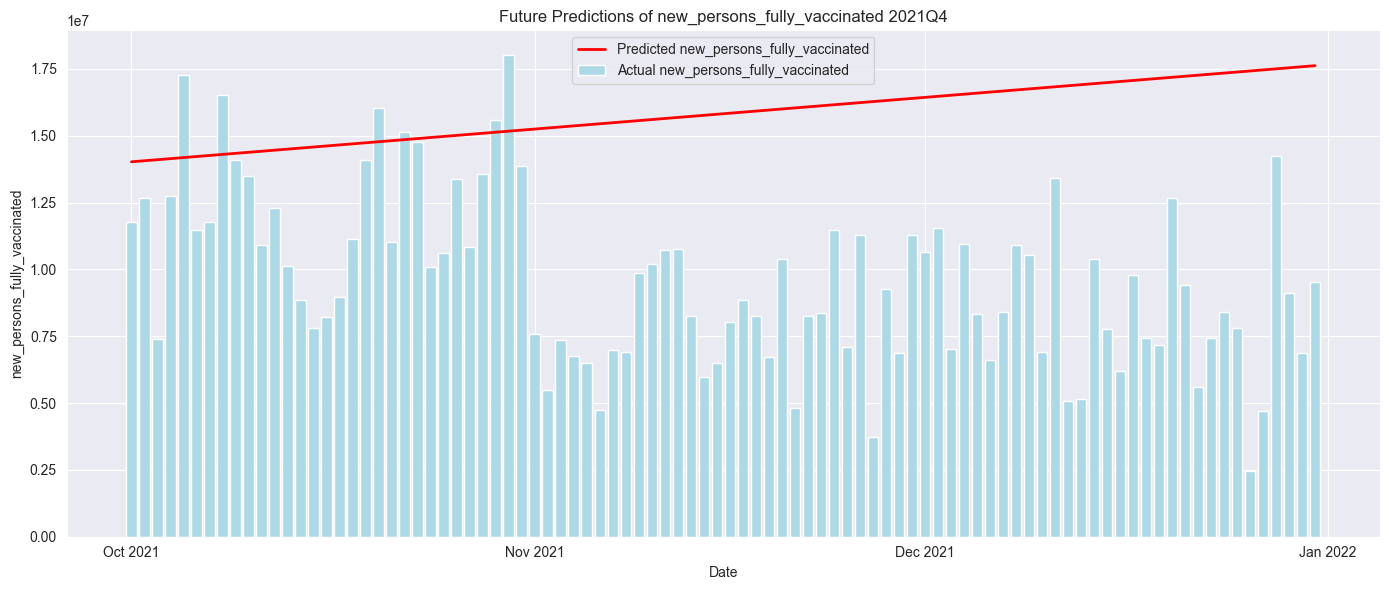

Training Quarter 2021Q4 - R²: 0.31 - MSE: 7678379678764.66 - MAE: 2119633.49
Future Quarter 2021Q4 - R²: -5.25 - MSE: 9847175668264.98 - MAE: 2099842.60 


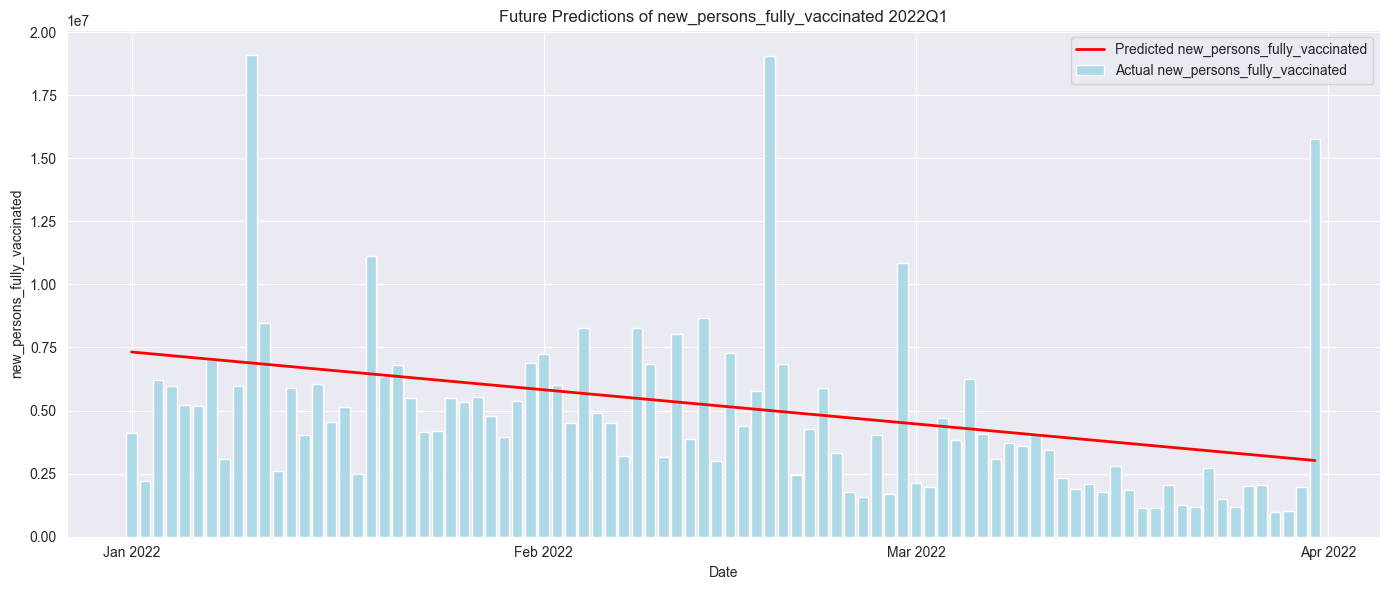

Training Quarter 2022Q1 - R²: 0.31 - MSE: 3976420172103.03 - MAE: 1632176.92
Future Quarter 2022Q1 - R²: 0.12 - MSE: 1150198568516.09 - MAE: 918345.12 


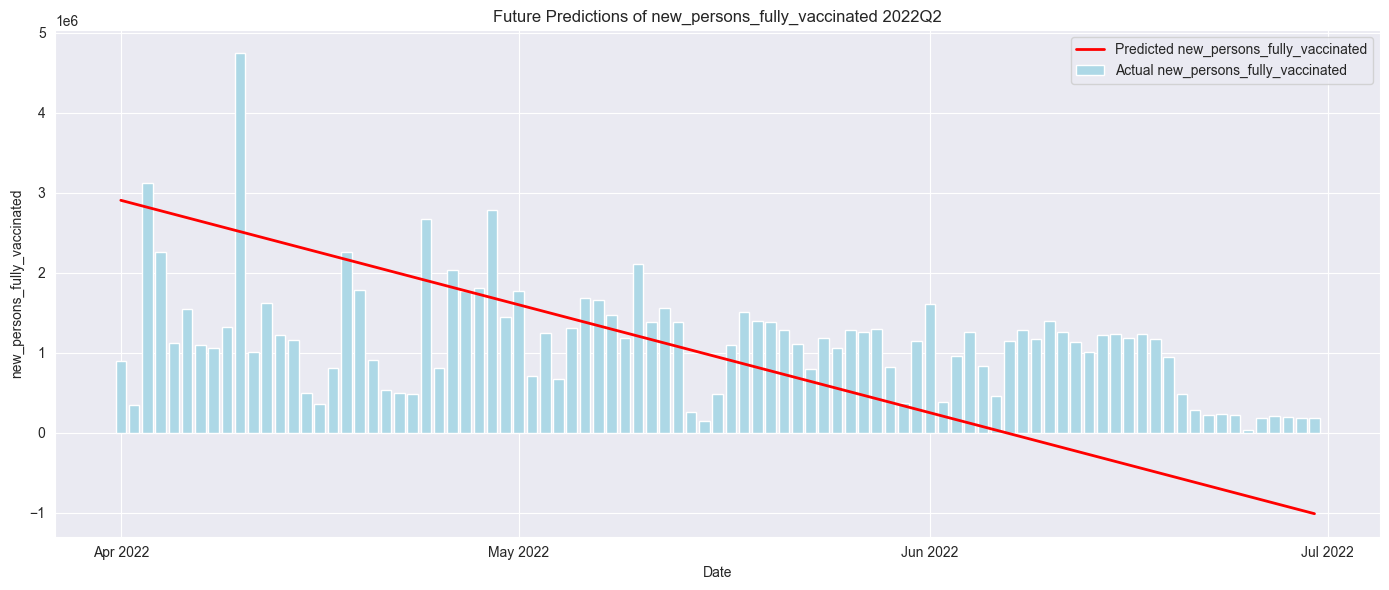

Training Quarter 2022Q2 - R²: 0.16 - MSE: 423313937566.68 - MAE: 573897.43
Future Quarter 2022Q2 - R²: 0.11 - MSE: 66214108707.87 - MAE: 221923.52 


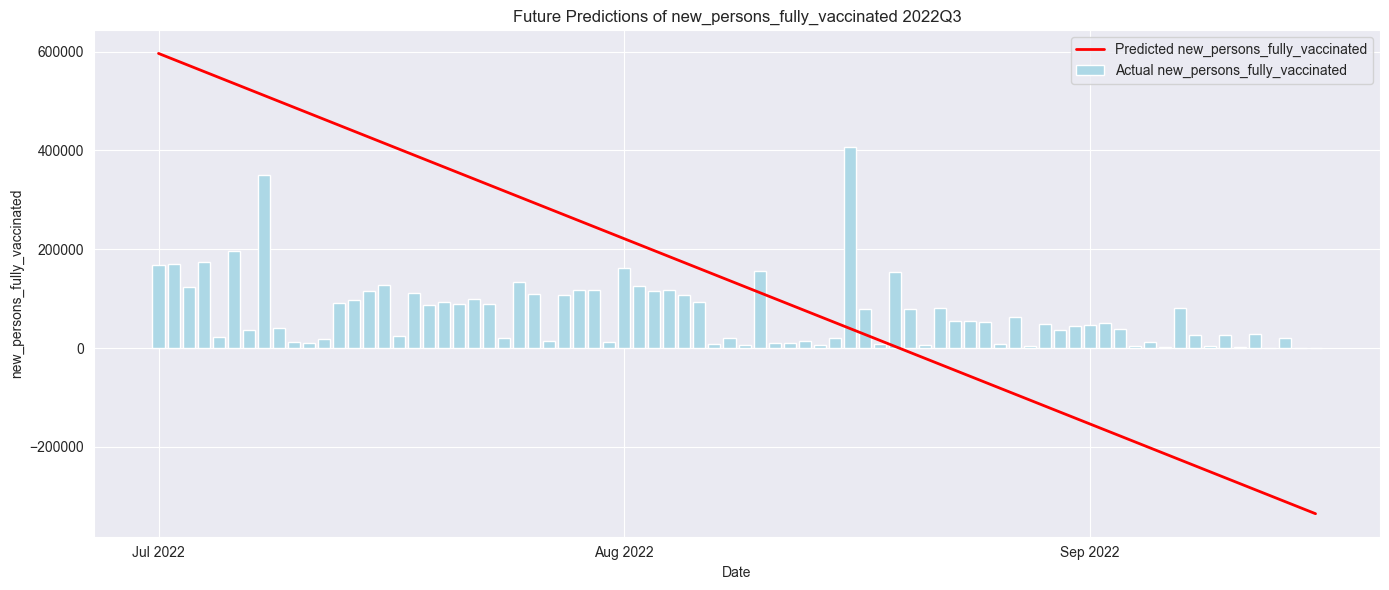

In [127]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = 'new_persons_fully_vaccinated'

# Linear regression for new confirmed cases
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)
# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[feature], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df2['date'], df2['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = df_daily['Q'].unique()
training_quarters = quarters[:-1]
future_quarters = quarters[1:]
for quarter, future_quarter in zip(training_quarters, future_quarters):
    quarter_data = df_daily[df_daily['Q'] == quarter]
    future_quarter_data = df_daily[df_daily['Q'] == future_quarter]
    if len(quarter_data) > 10 and len(future_quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data[feature]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Training Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f}")
        y_future_pred = model.predict(future_quarter_data[['data_num']])
        r2 = r2_score(y_future_pred, future_quarter_data[feature])
        mse = mean_squared_error(y_future_pred, future_quarter_data[feature])
        mae = mean_absolute_error(y_future_pred, future_quarter_data[feature])
        print(f"Future Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f} ")

        fig, ax = plt.subplots(figsize=(14, 6))
        plt.bar(df_daily['date'][df_daily['Q'] == future_quarter], df_daily[feature][df_daily['Q'] == future_quarter], color='lightblue', label=f'Actual {feature}')
        plt.plot(df_daily['date'][df_daily['Q'] == future_quarter], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.xlabel('Date')
        plt.ylabel(f'{feature}')
        plt.title(f'Future Predictions of {feature} {future_quarter}')
        plt.legend()
        plt.tight_layout()
        plt.show()

3.4.2 Liczba zaaplikowanych szczepionek

Training Data Metrics:
MAE: 192568.01
MSE: 73452501929.54
R²: -0.25

Future Data Metrics:
MAE: 10168199.45
MSE: 157591373498732.19
R²: -0.86


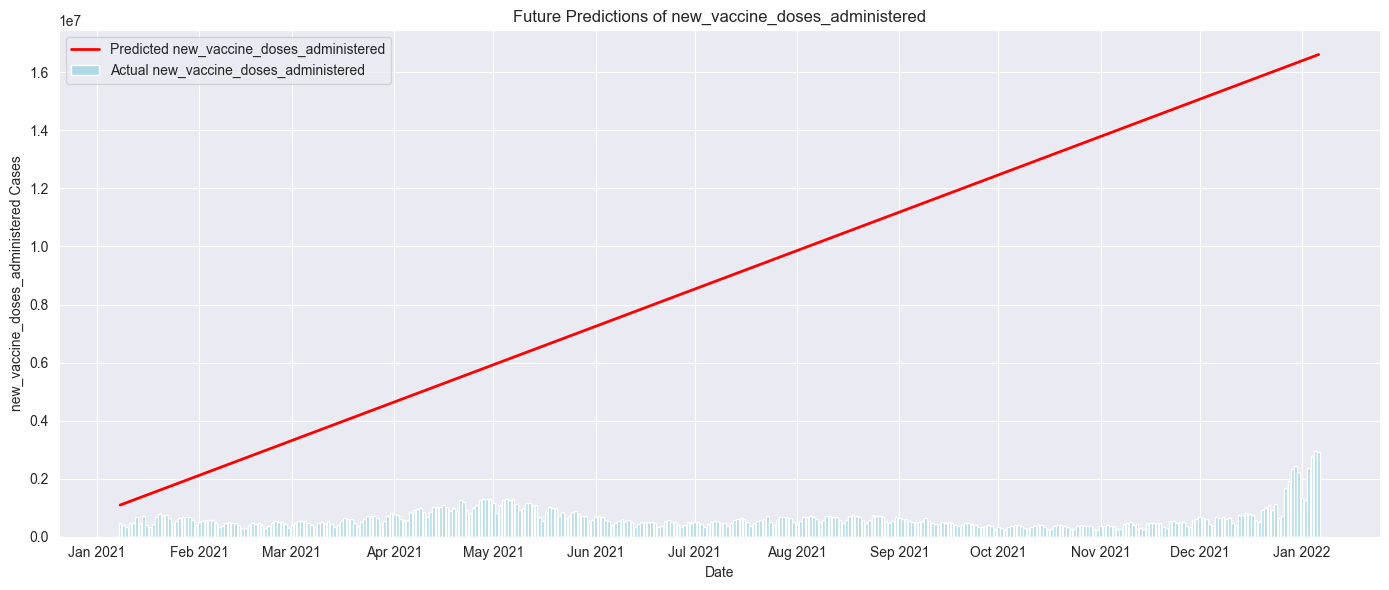


Analysis with shorter time periods (quarterly):
Training Quarter 2020Q4 - R²: 0.82 - MSE: 6450903486.82 - MAE: 73985.68
Future Quarter 2020Q4 - R²: -30.86 - MSE: 32454885240248.77 - MAE: 4522907.46 


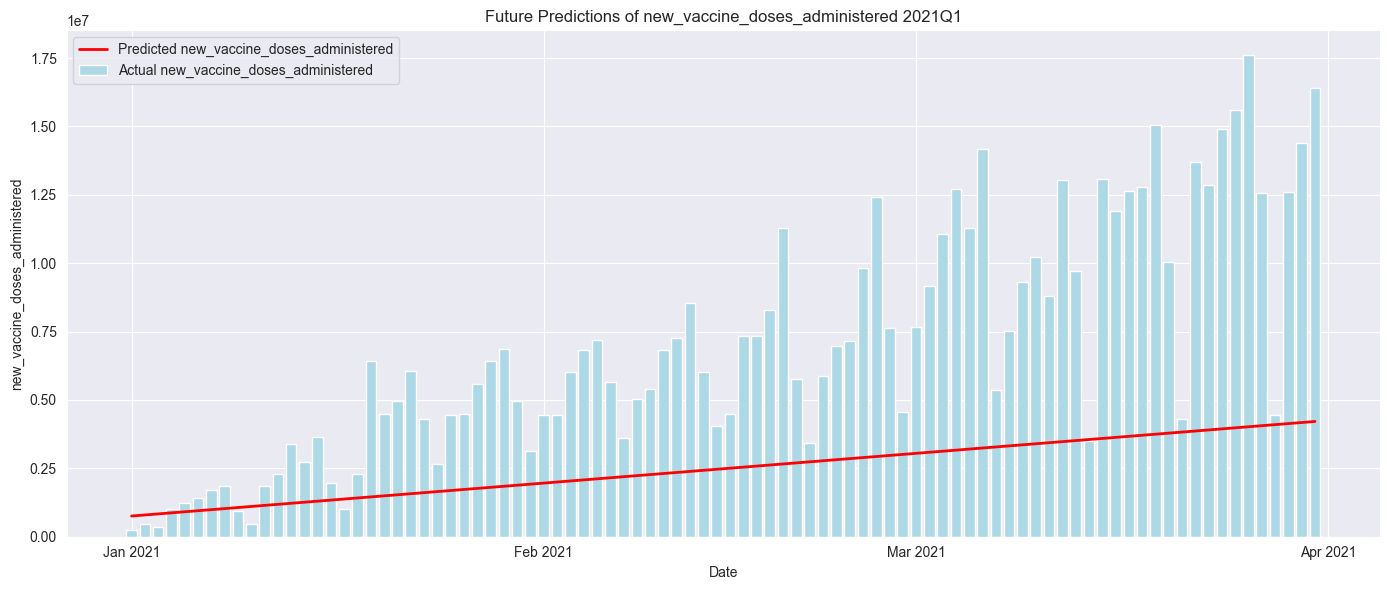

Training Quarter 2021Q1 - R²: 0.38 - MSE: 8448313430511.21 - MAE: 2047479.68
Future Quarter 2021Q1 - R²: -0.69 - MSE: 26099313526290.10 - MAE: 3917485.78 


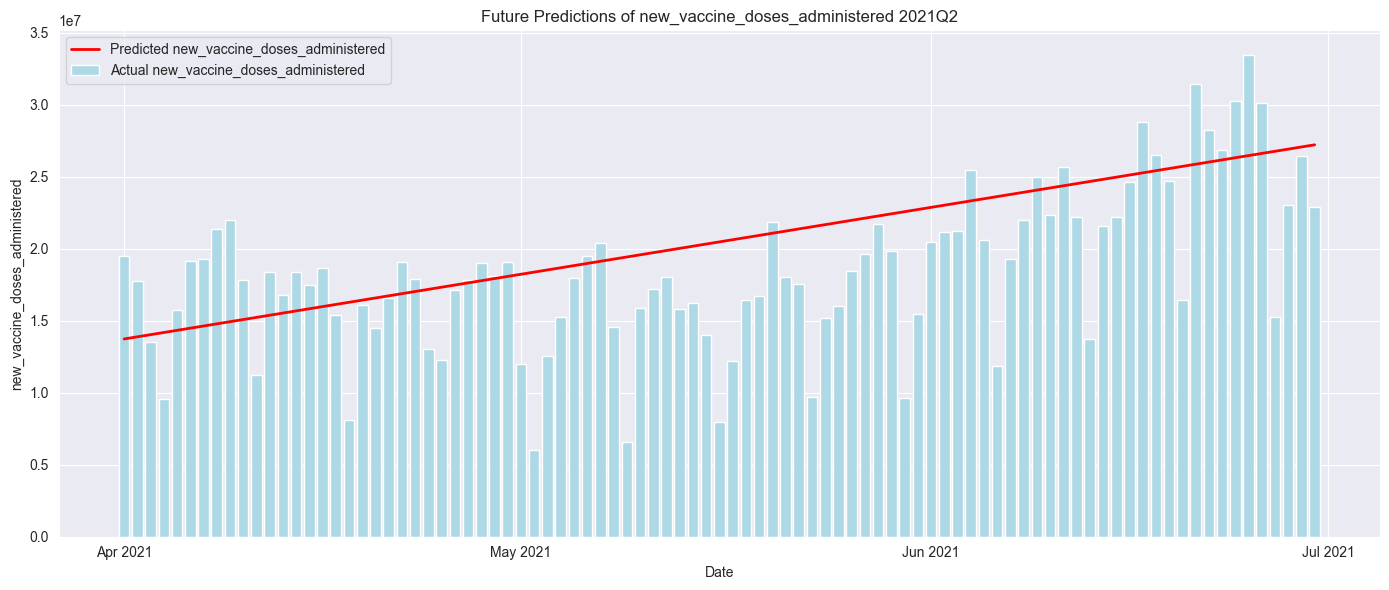

Training Quarter 2021Q2 - R²: 0.29 - MSE: 15821727115477.57 - MAE: 2892325.69
Future Quarter 2021Q2 - R²: -3.42 - MSE: 41284839268735.48 - MAE: 5023574.02 


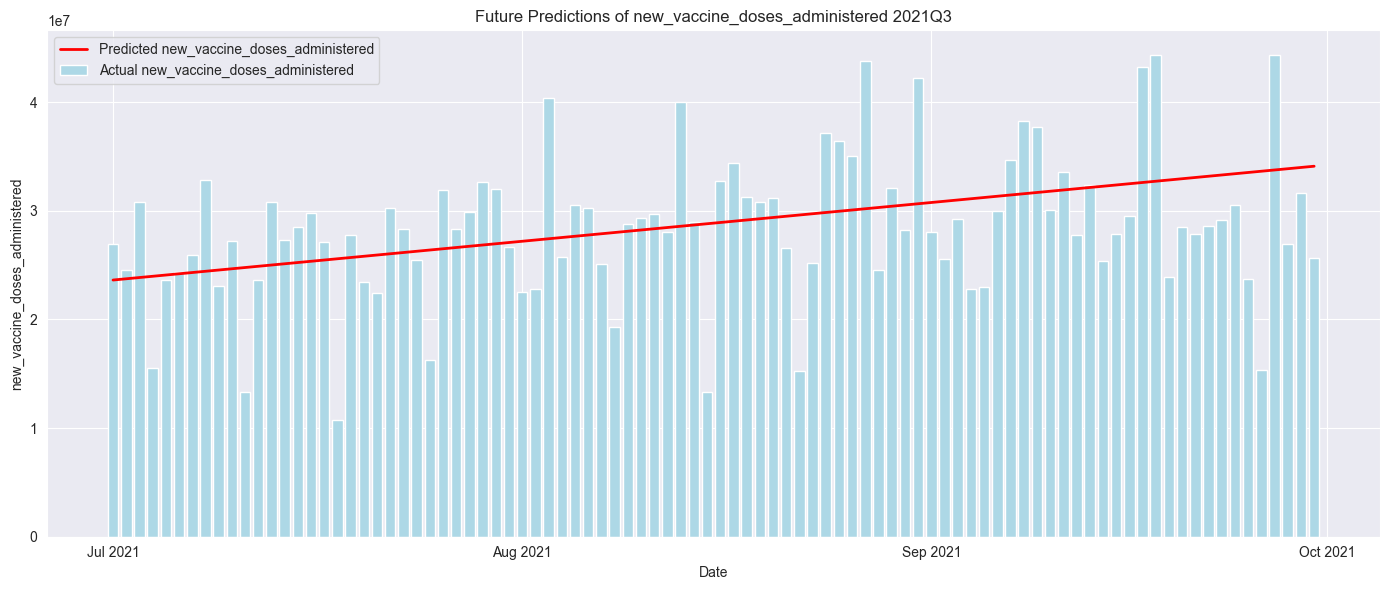

Training Quarter 2021Q3 - R²: 0.12 - MSE: 17748071158047.32 - MAE: 3108624.58
Future Quarter 2021Q3 - R²: -74.90 - MSE: 314654465330436.06 - MAE: 16454607.24 


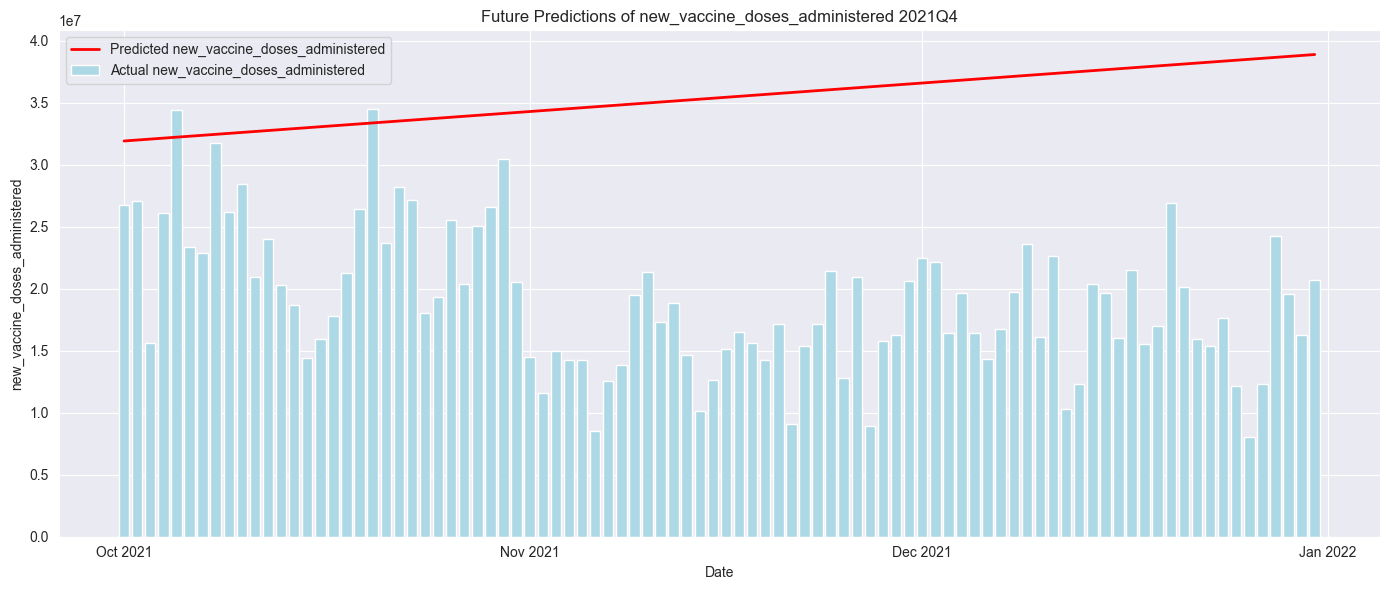

Training Quarter 2021Q4 - R²: 0.28 - MSE: 28057008569927.52 - MAE: 4197835.26
Future Quarter 2021Q4 - R²: -17.23 - MSE: 66894428260611.13 - MAE: 4801488.46 


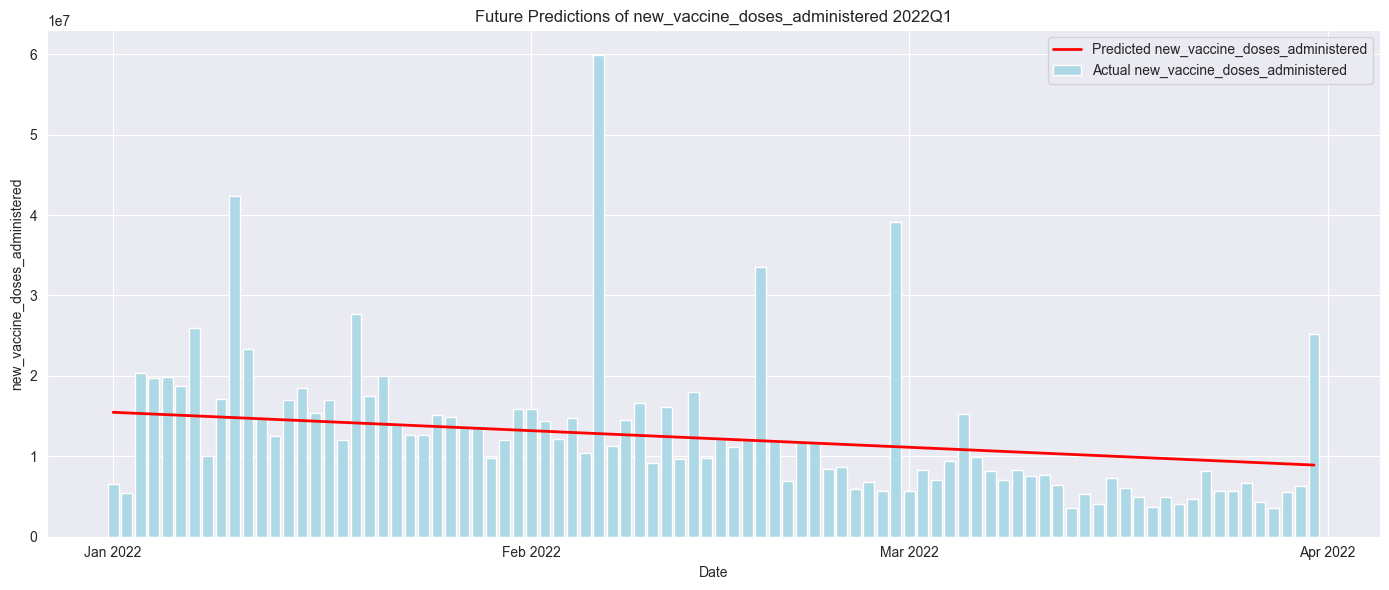

Training Quarter 2022Q1 - R²: 0.20 - MSE: 31151400556891.14 - MAE: 4583598.75
Future Quarter 2022Q1 - R²: -0.86 - MSE: 34255760991351.79 - MAE: 4856718.41 


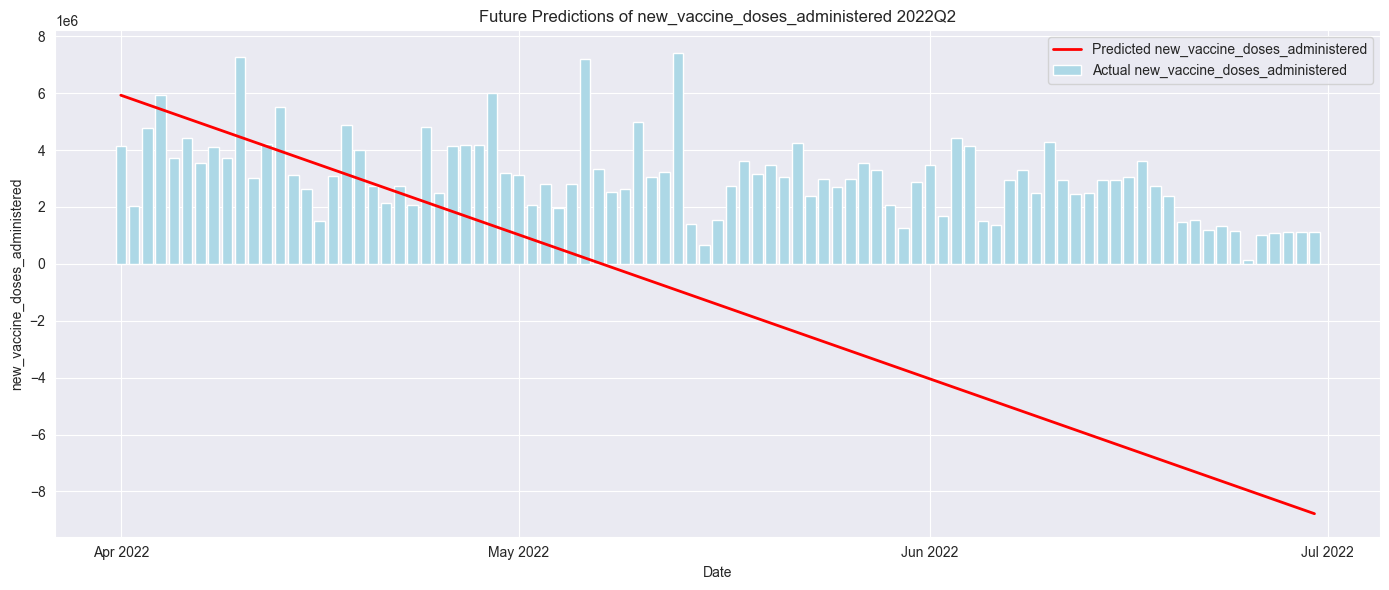

Training Quarter 2022Q2 - R²: 0.24 - MSE: 2535666229386.13 - MAE: 1244625.13
Future Quarter 2022Q2 - R²: -0.68 - MSE: 502708063106.98 - MAE: 574186.49 


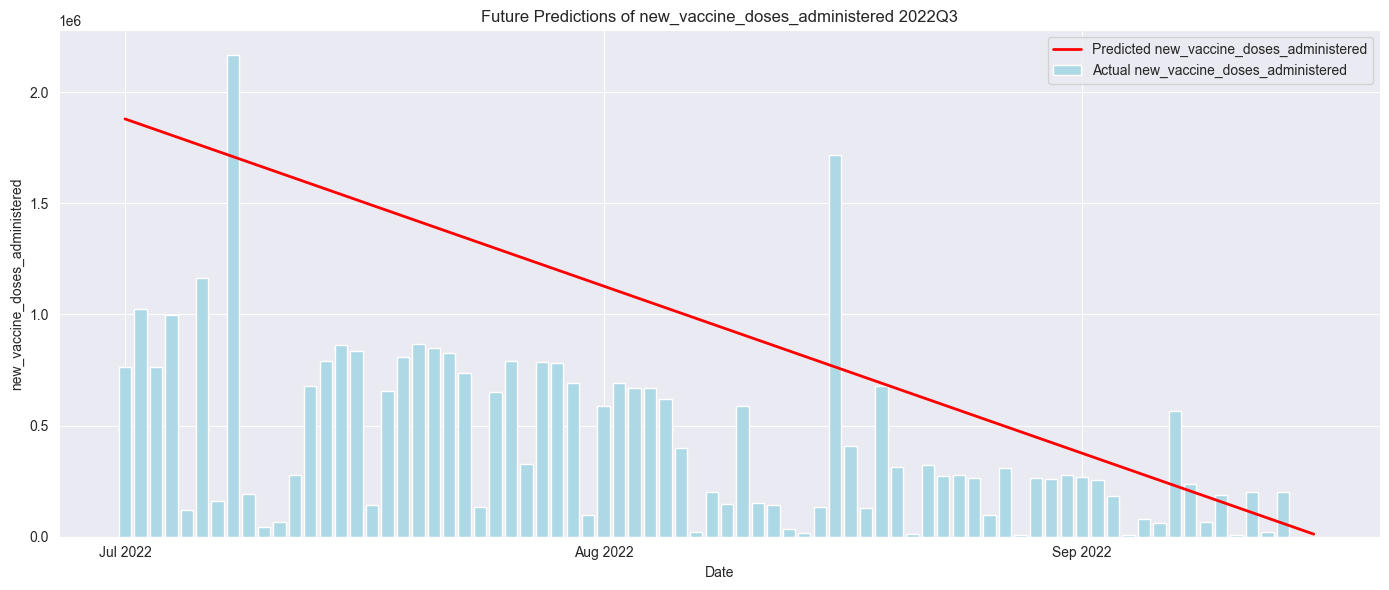

In [128]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

feature = 'new_vaccine_doses_administered'

# Linear regression for new confirmed cases
df_daily['data_num'] = df_daily['date'].map(pd.Timestamp.toordinal)
df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')][['location_key', 'date', 'country_name_x', 'subregion1_name',  'new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']]
df1['data_num'] = df1['date'].map(pd.Timestamp.toordinal)
# Train the model
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[feature], test_size=0.2)
model.fit(X_train, y_train)

# Evaluate on test data
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Training Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Predict future values
df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
X_future, y_future = df2[['data_num']], df2[feature]

y_future_pred = model.predict(X_future)
mse = mean_squared_error(y_future, y_future_pred)
mae = mean_absolute_error(y_future, y_future_pred)
r2 = r2_score(y_future, y_future_pred)
print(f"\nFuture Data Metrics:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.2f}")

# Plot
ax, fig = plt.subplots(figsize=(14, 6))
plt.bar(df2['date'], df2['new_confirmed'], color='lightblue', label=f'Actual {feature}')
plt.plot(df2['date'], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
plt.xlabel('Date')
plt.ylabel(f'{feature} Cases')
plt.title(f'Future Predictions of {feature}')
plt.legend()
fig.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.tight_layout()
plt.show()

# Analysis with shorter time periods
print("\nAnalysis with shorter time periods (quarterly):")
quarters = df_daily['Q'].unique()
training_quarters = quarters[:-1]
future_quarters = quarters[1:]
for quarter, future_quarter in zip(training_quarters, future_quarters):
    quarter_data = df_daily[df_daily['Q'] == quarter]
    future_quarter_data = df_daily[df_daily['Q'] == future_quarter]
    if len(quarter_data) > 10 and len(future_quarter_data) > 10:  # Ensure enough data points
        X = quarter_data[['data_num']]
        y = quarter_data[feature]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = LinearRegression()
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        r2 = r2_score(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        print(f"Training Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f}")
        y_future_pred = model.predict(future_quarter_data[['data_num']])
        r2 = r2_score(y_future_pred, future_quarter_data[feature])
        mse = mean_squared_error(y_future_pred, future_quarter_data[feature])
        mae = mean_absolute_error(y_future_pred, future_quarter_data[feature])
        print(f"Future Quarter {quarter} - R²: {r2:.2f} - MSE: {mse:.2f} - MAE: {mae:.2f} ")

        fig, ax = plt.subplots(figsize=(14, 6))
        plt.bar(df_daily['date'][df_daily['Q'] == future_quarter], df_daily[feature][df_daily['Q'] == future_quarter], color='lightblue', label=f'Actual {feature}')
        plt.plot(df_daily['date'][df_daily['Q'] == future_quarter], y_future_pred, color='red', linewidth=2, label=f'Predicted {feature}')
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
        plt.xlabel('Date')
        plt.ylabel(f'{feature}')
        plt.title(f'Future Predictions of {feature} {future_quarter}')
        plt.legend()
        plt.tight_layout()
        plt.show()

## Podsumowanie i analiza wyników


Summary of R² values for all metrics:
             Metric  R² (Training)  R² (Future)
0         New Cases       0.451327   -21.644662
1        New Deaths       0.604549   -56.540832
2  New Vaccinations       0.174451    -0.448242
3  Fully Vaccinated     -35.537768    -2.399601
4     Vaccine Doses       0.151428    -0.932057


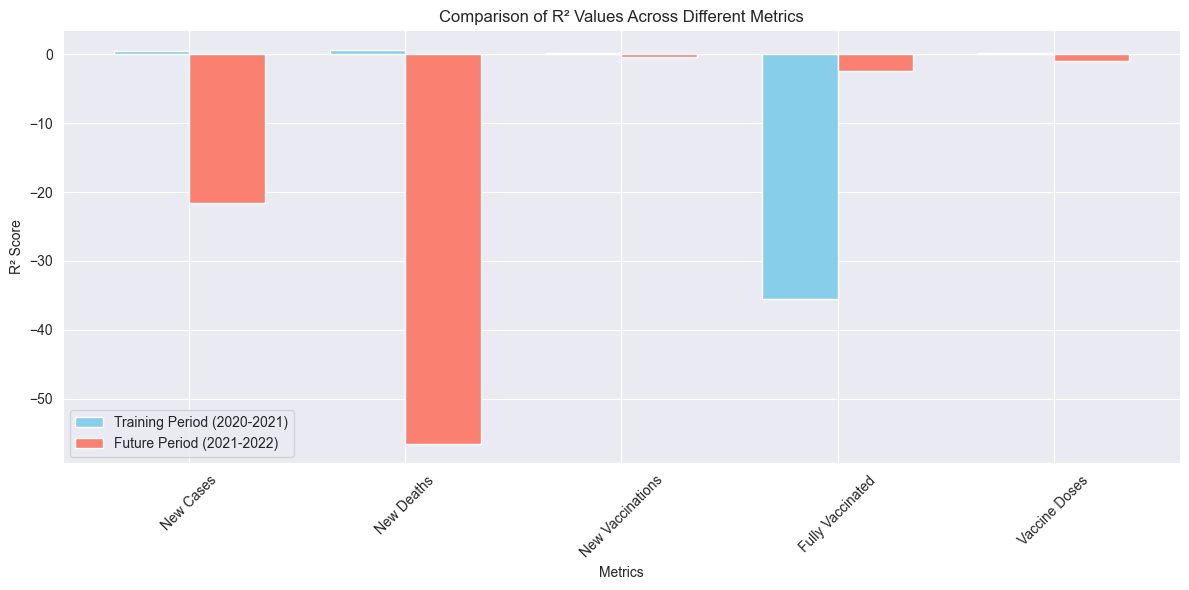


Analysis of quarterly results:


In [129]:
# Create a summary of R² values for all metrics
print("Summary of R² values for all metrics:")
metrics = ['new_confirmed', 'new_deceased', 'new_persons_vaccinated', 'new_persons_fully_vaccinated', 'new_vaccine_doses_administered']
metric_names = ['New Cases', 'New Deaths', 'New Vaccinations', 'Fully Vaccinated', 'Vaccine Doses']

# Create dataframe for full period analysis
r2_values = []
for metric in metrics:
    df1 = df_daily[(df_daily['date'] > '01-07-2020') & (df_daily['date'] < '01-07-2021')]
    X_train, X_test, y_train, y_test = train_test_split(df1[['data_num']], df1[metric], test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    # Future predictions
    df2 = df_daily[(df_daily['date'] > '01-07-2021') & (df_daily['date'] < '01-07-2022')]
    X_future, y_future = df2[['data_num']], df2[metric]
    y_future_pred = model.predict(X_future)
    r2_future = r2_score(y_future, y_future_pred)

    r2_values.append({'Metric': metric_names[metrics.index(metric)], 
                      'R² (Training)': r2, 
                      'R² (Future)': r2_future})

r2_df = pd.DataFrame(r2_values)
print(r2_df)

# Create a bar chart to compare R² values
plt.figure(figsize=(12, 6))
bar_width = 0.35
x = np.arange(len(metric_names))

plt.bar(x - bar_width/2, r2_df['R² (Training)'], bar_width, label='Training Period (2020-2021)', color='skyblue')
plt.bar(x + bar_width/2, r2_df['R² (Future)'], bar_width, label='Future Period (2021-2022)', color='salmon')

plt.xlabel('Metrics')
plt.ylabel('R² Score')
plt.title('Comparison of R² Values Across Different Metrics')
plt.xticks(x, metric_names, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# Analysis of quarterly results
print("\nAnalysis of quarterly results:")
quarters = ['2020-Q3', '2020-Q4', '2021-Q1', '2021-Q2']
quarterly_r2 = {}

for metric in metrics:
    quarterly_r2[metric] = []
    for quarter in quarters:
        quarter_data = df_daily[df_daily['Q'] == quarter]
        if len(quarter_data) > 10:
            X = quarter_data[['data_num']]
            y = quarter_data[metric]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            model = LinearRegression()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            r2 = r2_score(y_test, y_pred)
            quarterly_r2[metric].append({'Quarter': quarter, 'R²': r2})
        else:
            quarterly_r2[metric].append({'Quarter': quarter, 'R²': None})

# Create a heatmap of quarterly R² values
quarterly_data = []
for i, metric in enumerate(metrics):
    for q_data in quarterly_r2[metric]:
        if q_data['R²'] is not None:
            quarterly_data.append({
                'Metric': metric_names[i],
                'Quarter': q_data['Quarter'],
                'R²': q_data['R²']
            })

if quarterly_data:
    q_df = pd.DataFrame(quarterly_data)
    q_pivot = q_df.pivot(index='Metric', columns='Quarter', values='R²')

    plt.figure(figsize=(12, 8))
    sns.heatmap(q_pivot, annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title('R² Values by Metric and Quarter')
    plt.tight_layout()
    plt.show()
